<div style="background-image: url('https://img.lovepik.com/background/20211022/large/lovepik-purple-gradient-background-image_401735609.jpg');padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px #000000;">
    <h1 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Defining The Question.</h1>
    <h2 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Group 1</h2>
    <h3 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Date: 06/09/2023</h3>
    <h4 style="color:white;text-align:center;text-shadow: 2px 2px 4px #000000;font-weight: bold;">Elsie Ochieng, Richard Taracha, Cindy King'ori, Peter Muthoma </h4>
</div>

### a) Specifying the Data Analysis Question

- Identify factors that contribute to the average price of a house
- Build a multiple linear regression model to predict the house price.
- Check for the assumptions of your model as well as perform k-fold (k=10) cross-validation while challenging the solution

---

### b) Defining the Metric for Success

**The project will be considered a success when we are able to fit linear regression to our data and make predictions.**

**While performing model selection/diagnosis, we was required to perform the following steps in an effort to check for the following assumptions:**

- Assess the linearity of the model (parameters)
- Assess heteroskedasticity
- Assess the normality of residual distribution
- Assess multicollinearity

---

### c) Understanding the Context 

**If you want to work for a top company in Seattle, you might be curious about how much it costs to live in King County. This is the largest and most populated county in Washington State, where Seattle and its suburbs are located. About 10 Fortune 500 Companies have their headquarters here, such as Starbucks, Nordstrom, Alaska Airlines, Costco, Expedia, Microsoft, and Amazon. Microsoft and Amazon are among the Big Five tech companies that many people aspire to join.**

**But finding a house in King County is not easy. There are many factors that affect the price, such as the number of bedrooms, bathrooms, and floors. You might have a different preference than someone else. Wouldn't it be nice if you could estimate the price of your ideal house based on the features you want? That way, you could plan ahead and make your dream house a reality.**

### d) Recording the Experimental Design

1. Load libraries and dataset.
2. Perform data cleaning where necessary.
3. Exploratory Data Analysis.
4. Compute correlations and drop highly correlated variables.
5. Split into 80% train and 20% test sets, apply Linear Regression, and make predictions.
6. Calculate RMSE and R-squared values.
7. Interpret and summarize findings.
10

. Challenge the solution.
7. Provide recommendations.

---

### e) Data Relevance & Acknowledgement.

**These dataset provided was aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.** 

**Project Sources:**
- https://data.kingcounty.gov/
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

**The data was relevant to answering the question.**

---

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Data Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>id</td>
      <td>Unique identifier of the house</td>
    </tr>
    <tr>
      <td>date</td>
      <td>Date of sale</td>
    </tr>
    <tr>
      <td>price</td>
      <td>Sell price</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms</td>
    </tr>
    <tr>
      <td>sqft_liv</td>
      <td>Size of interior space in square feet</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>Size of land lot in square feet</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>Number of floors</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>'1' if property has a waterfront, '0' if not</td>
    </tr>
    <tr>
      <td>view</td>
      <td>An index from 0 to 4 of how good the property's view is</td>
    </tr>
    <tr>
      <td>condition</td>
      <td>Condition of the house, ranked from 1 to 5, 5 being the greatest condition</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Classification by construction material and worksmanship quality. Numeric scale with higher numbers being better. For more information see the King County glossary</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>Square feet above ground</td>
    </tr>
    <tr>
      <td>sqft_below</td>
      <td>Square feet below ground</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year built</td>
    </tr>
    <tr>
      <td>yr_renov</td>
      <td>Year renovated. '0' if never renovated</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>5 digit zip code</td>
    </tr>
    <tr>
      <td>lat</td>
      <td>Latitude</td>
    </tr>
    <tr>
      <td>long</td>
      <td>Longitude</td>
    </tr>
    <tr>
      <td>squft_liv15</td>
      <td>Average size of interior space for closest 15 houses, in square feet</td>
    </tr>
    <tr>
      <td>squft_lot15</td>
      <td>Average size of land lot for closest 15 houses, in square feet</td>
    </tr>
  </tbody>
</table>


# <font color='goldenrod'>1. Load The Necessary Libraries & Data</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import scipy.stats as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso



from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.pipeline import Pipeline, make_pipeline


# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
# Don't show numbers as scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

c:\Users\tarac\.conda\envs\DS\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data\kc_house_data.csv')

df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition          grade  sqft_above  \
0      5650    1.00        NaN  NONE    Average      7 Average        1180   
1      7242    2.00         NO  NONE    Average      7 Average        2170   
2     10000    1.00         NO  NONE    Average  6 Low Average         770   
3      5000    1.00         NO  NONE  Very Good      7 Average        1050   
4      8080    1.00         NO  NONE    Average         8 Good        1680   

  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0           0.0      1955          0.00    98178 47.51 -122.26           1340   
1         400.0      1951       1991.00    98125 47.72 -122.32           1690   
2           0.0      1933           NaN    98028 47.74 -122.23           2720   
3         910.0      1965          0.00    98136 47.52 -122.39           1360   
4           0.0      1987          0.00    98074 47.62 -122.05           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [3]:
# Check the shape to see the number of columns and row
df.shape

(21597, 21)

In [4]:
# checking the datatype and number of nulls and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# <font color='goldenrod'>2. Data Preparation and Cleaning </font>

**To begin with, we checked for the percentage of null values in the columns accompanied by a visualisation on the same**

In [5]:
# Dealing with missing values
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)*100
missing_percentage.head()

yr_renovated   17.79
waterfront     11.00
view            0.29
id              0.00
sqft_above      0.00
dtype: float64

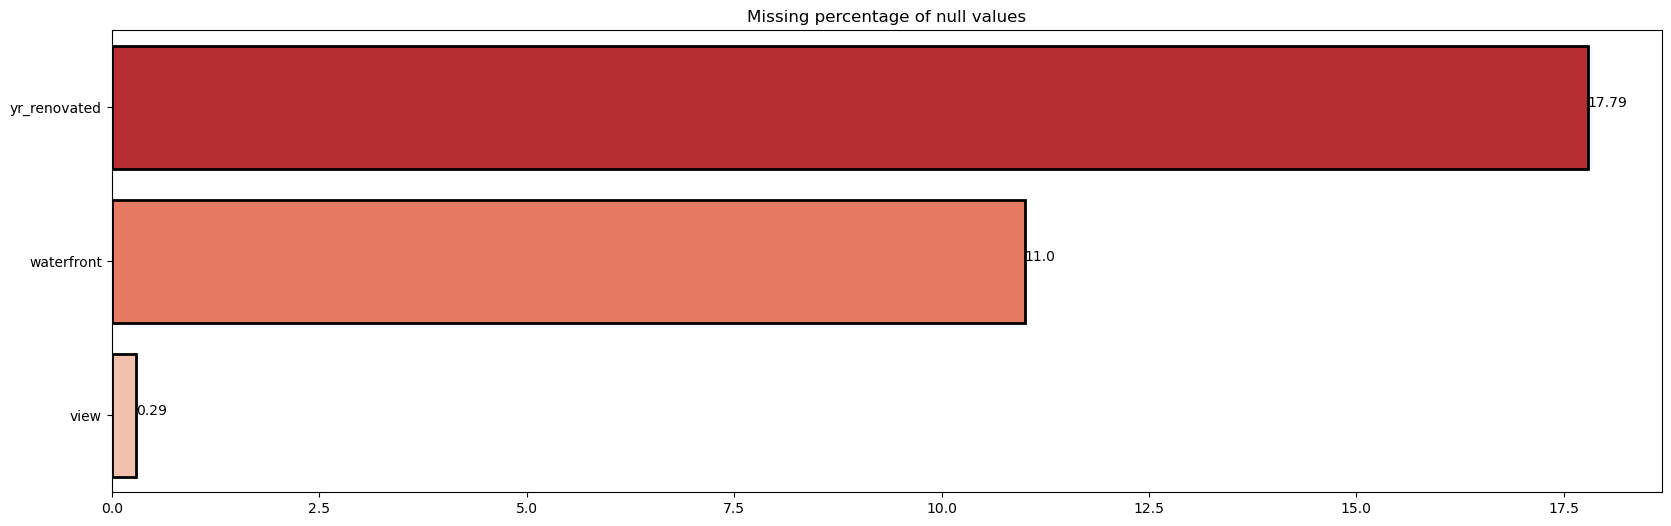

In [6]:
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.rcParams['figure.figsize'] = (20,6)
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette='Reds_r', orient='h', edgecolor='black', linewidth=2)
plt.title("Missing percentage of null values")

# Add annotations
for index, value in enumerate(missing_percentage):
    plt.text(value, index, str(round(value,2)))


plt.show()

**The waterfront, view, and yr_renovated variables all have missing values. Let's inspect the value counts for each of these columns.**

In [7]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
df['yr_renovated'].value_counts()

0.00       17011
2014.00       73
2013.00       31
2003.00       31
2007.00       30
           ...  
1951.00        1
1953.00        1
1946.00        1
1976.00        1
1948.00        1
Name: yr_renovated, Length: 70, dtype: int64

**- A large portion of the homes in the dataset do not have renovation dates, as indicated by the value '0' in that column. We will fill in the missing values for 'yr_renovated' with 0 as this also entails that the house may have never been renovated hence missing a renovation date.**

**- For the "waterfront" variable, since it is a categorical variable with only two possible values (yes or no), we can replace the missing values with 'NO'. Here we are making the assumption that this is a missing value because at the time of data collection the value was ommited as the house does have a waterfront.**

**- For the "view" variable, we can replace the missing values with 'NONE'.**

In [10]:
# Replace missing values in the "yr_renovated" variable with 0
df['yr_renovated'].fillna(0, inplace=True)

# Replace missing values in the "waterfront" variable with the `NO` value
df['waterfront'].fillna('NO', inplace=True)

# Replace missing values in the "view" variable with the the `NONE` value
df['view'].fillna('NONE', inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

id              0.00
grade           0.00
sqft_living15   0.00
long            0.00
lat             0.00
zipcode         0.00
yr_renovated    0.00
yr_built        0.00
sqft_basement   0.00
sqft_above      0.00
condition       0.00
date            0.00
view            0.00
waterfront      0.00
floors          0.00
sqft_lot        0.00
sqft_living     0.00
bathrooms       0.00
bedrooms        0.00
price           0.00
sqft_lot15      0.00
dtype: float64

### Feature Enginnering

**`Date` Column:**

In [12]:
# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df.date)

# Extract the year, month, day, and day of the week  from the "date" column and create new columns
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df["day_of_week"] = df.date.dt.day_name()

# Drop the original "date" column, as we've extracted the relevant date components
df = df.drop("date", axis=1)

**`Yr_renovated` column:** 

After examining this column the houses with non-null values were considered renovated and those with null values were considered not renovated. A column is_renovated was created to contain binary encoding assigning 1 to renovated and 0 to not renovated houses.

In [13]:
#Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

#Create 'is_renovated' column and set values based on 'yr_renovated'
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

**`price_per_sqft` column:**

In [14]:
df['price_per_sqft'] = df['price']/df['sqft_living']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  object 
 8   view            21597 non-null  object 
 9   condition       21597 non-null  object 
 10  grade           21597 non-null  object 
 11  sqft_above      21597 non-null  int64  
 12  sqft_basement   21597 non-null  object 
 13  yr_built        21597 non-null  int64  
 14  yr_renovated    21597 non-null  float64
 15  zipcode         21597 non-null  int64  
 16  lat             21597 non-null  float64
 17  long            21597 non-null 

### Data Inconsistencies

**`Grade` Column:**

The column has data type inconsistency where the values have bith numerical values and categorical. To remove the inconsistency we chose to maintain the integer values

In [16]:
#Check count of values in the grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [17]:
# Use use the str.extract() to  digits from the mixed' column
df['grade'] = df['grade'].str.extract('(\d+)')

# Convert the "grade" column to numeric (integer)
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')

**`Sqft_basement` column:**

The column datatype os object however a look into the values in the column shows that there are numerical values

In [18]:
# Attempt to convert the column to numeric and catch errors
try:
    df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
except ValueError as e:
    # Print the error message which will contain information about the problematic values
    print("Error:", e)

Error: Unable to parse string "?" at position 6


**From the sample we can see that there is a '?' value which is causing the difference in datatype for the column**

In [19]:
#Convert datatype to numeric replacing ? with NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

#Check number of null values in column
df['sqft_basement'].isnull().sum()

454

**Following the conversion of ? to null values, the next step is to replace the null values in the column with the mean**

In [20]:
# Replace null values with mean value
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)

### Working with categorical variables

In [21]:
#Checking for categorical type variables
df.select_dtypes('object').sample(5)

waterfront     view  condition day_of_week
16093         NO     NONE  Very Good    Thursday
1072          NO  AVERAGE       Good      Friday
8227          NO     NONE       Good   Wednesday
6754          NO     NONE  Very Good     Tuesday
19532         NO     NONE    Average      Friday

**`waterfront` column:**

**The "waterfront" variable of a house seems to be a categorical variable with two unique values: "NO" and "YES". One way to handle this variable would be to encode it as a binary variable, where "NO" is represented by 0 and "YES" is represented by 1. This would allow you to use this variable in a numerical analysis or model. Another way to handle this variable is to keep it as a categorical variable and use techniques such as one-hot encoding probaly later in a prediction pipeline.**

**`view` column:**

**One way to handle this variable is to treat it as an ordinal variable, where each value represents a different level of view quality. For example, you could assign numerical values to each level, such as NONE = 0, AVERAGE = 1, GOOD = 2, FAIR = 3, and EXCELLENT = 4. This would allow you to use this variable in statistical analyses or machine learning models that require numerical input.**

**`condition` column:**

The “condition” variable of a house appears to be an ordinal categorical variable, with values ranging from 1 (Poor) to 5 (Very Good). There are several ways to handle this type of variable, depending on the analysis you want to perform. One approach could be to treat the variable as a numerical variable and use the numerical values directly in the analysis. We chose to use Custom Mapping to encode the categorical variables.

**`day_of_week` column:**

**We can also use a Onehotencoder for this variable as well.**

In [22]:
df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 221900.00         3       1.00         1180      5650   
1      6414100192 538000.00         3       2.25         2570      7242   
2      5631500400 180000.00         2       1.00          770     10000   
3      2487200875 604000.00         4       3.00         1960      5000   
4      1954400510 510000.00         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018 360000.00         3       2.50         1530      1131   
21593  6600060120 400000.00         4       2.50         2310      5813   
21594  1523300141 402101.00         2       0.75         1020      1350   
21595   291310100 400000.00         3       2.50         1600      2388   
21596  1523300157 325000.00         2       0.75         1020      1076   

       floors waterfront  view  condition  grade  sqft_above  sqft_basement  \
0        1.00         NO  NONE    Average      7        1180           0.00   
1        2.00         NO  NONE    Average      7        2170         400.00   
2        1.00         NO  NONE    Average      6         770           0.00   
3        1.00         NO  NONE  Very Good      7        1050         910.00   
4        1.00         NO  NONE    Average      8        1680           0.00   
...       ...        ...   ...        ...    ...         ...            ...   
21592    3.00         NO  NONE    Average      8        1530           0.00   
21593    2.00         NO  NONE    Average      8        2310           0.00   
21594    2.00         NO  NONE    Average      7        1020           0.00   
21595    2.00         NO  NONE    Average      8        1600           0.00   
21596    2.00         NO  NONE    Average      7        1020           0.00   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1933          0.00    98028 47.74 -122.23           2720   
3          1965          0.00    98136 47.52 -122.39           1360   
4          1987          0.00    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21592      2009          0.00    98103 47.70 -122.35           1530   
21593      2014          0.00    98146 47.51 -122.36           1830   
21594      2009          0.00    98144 47.59 -122.30           1020   
21595      2004          0.00    98027 47.53 -122.07           1410   
21596      2008          0.00    98144 47.59 -122.30           1020   

       sqft_lot15  year  month  day day_of_week  is_renovated  price_per_sqft  
0            5650  2014     10   13      Monday             0          188.05  
1            7639  2014     12    9     Tuesday             1          209.34  
2            8062  2015      2   25   Wednesday             0          233.77  
3            5000  2014     12    9     Tuesday             0          308.16  
4            7503  2015      2   18   Wednesday             0          303.57  
...           ...   ...    ...  ...         ...           ...             ...  
21592        1509  2014      5   21   Wednesday             0          235.29  
21593        7200  2015      2   23      Monday             0          173.16  
21594        2007  2014      6   23      Monday             0          394.22  
21595        1287  2015      1   16      Friday             0          250.00  
21596        1357  2014     10   15   Wednesday             0          318.63  

[21597 rows x 26 columns]

### Checking for Duplicate Records

In [23]:
# Cheking fior duplicates
df.duplicated().any()

False

### Checking for Records with Outliers

In [24]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(5)

(5932, 26)


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
17586  7237500650 1280000.00         5       4.25         5040      9466   
1140   3320000810  380000.00         5       2.00         1680      3240   
12505  5700004525  970000.00         3       2.25         3060      9950   
7534   9310300300  411000.00         5       1.75         2860     12293   
8724    117000001  540000.00         4       4.25         1960      3565   

       floors waterfront     view condition  grade  sqft_above  sqft_basement  \
17586    2.00         NO     NONE   Average     11        5040           0.00   
1140     1.00         NO     NONE   Average      5         840         840.00   
12505    1.50         NO  AVERAGE      Good      9        1810        1250.00   
7534     1.00         NO     NONE      Good      8        1430        1430.00   
8724     2.00         NO     NONE   Average      7        1960           0.00   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
17586      2004          0.00    98059 47.53 -122.13           4300   
1140       1906          0.00    98144 47.60 -122.31           1380   
12505      1930          0.00    98144 47.58 -122.28           4950   
7534       1947          0.00    98133 47.74 -122.35           1920   
8724       1940       2003.00    98116 47.58 -122.38           1920   

       sqft_lot15  year  month  day day_of_week  is_renovated  price_per_sqft  
17586        9417  2015      2   13      Friday             0          253.97  
1140         1260  2015      2   24     Tuesday             0          226.19  
12505       10655  2014      6   24     Tuesday             0          316.99  
7534        18110  2014     10   13      Monday             0          143.71  
8724         5750  2014      5   27     Tuesday             1          275.51

In [25]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

27.47

**27.27% of the records have outliers. This doesn't account for more than 50 percent of our reords so we can safely discard them. But for now we will reatin to see if this negatively impacts out model.**

In [26]:
import seaborn as sns
import pandas as pd
import ipywidgets as widgets

def create_boxplots(df):
    def plot_boxplot(column):
        # Plotting Boxplots to view any outliers
        plt.style.use("bmh")
        flierprops = dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5)
        sns.boxplot(x=column, data=df, flierprops=flierprops, showmeans=True, linewidth=3.5,palette="Set3_r")
        plt.title(f"Boxplot Distribution of the '{column.title()}' Variable Checking for outliers")
        
    columns = list(df.columns)
    dropdown = widgets.Dropdown(options=columns)
    widgets.interact(plot_boxplot, column=dropdown)

# Example usage
create_boxplots(df)

interactive(children=(Dropdown(description='column', options=('id', 'price', 'bedrooms', 'bathrooms', 'sqft_li…

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  object 
 8   view            21597 non-null  object 
 9   condition       21597 non-null  object 
 10  grade           21597 non-null  int64  
 11  sqft_above      21597 non-null  int64  
 12  sqft_basement   21597 non-null  float64
 13  yr_built        21597 non-null  int64  
 14  yr_renovated    21597 non-null  float64
 15  zipcode         21597 non-null  int64  
 16  lat             21597 non-null  float64
 17  long            21597 non-null 

# <font color='goldenrod'>3. Explore</font>

## <font color='white'>3.1 Univariate Data analysis</font>

#### 3.1.1 Check statistics of the data set

In [28]:
df.describe()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors    grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
count 21597.00 21597.00    21597.00       21597.00  21597.00      21597.00   
mean      1.49     7.66     1788.60         291.85   1971.00         68.76   
std       0.54     1.17      827.76         437.82     29.38        364.04   
min       1.00     3.00      370.00           0.00   1900.00          0.00   
25%       1.00     7.00     1190.00           0.00   1951.00          0.00   
50%       1.50     7.00     1560.00           0.00   1975.00          0.00   
75%       2.00     8.00     2210.00         550.00   1997.00          0.00   
max       3.50    13.00     9410.00        4820.00   2015.00       2015.00   

       zipcode      lat     long  sqft_living15  sqft_lot15     year    month  \
count 21597.00 21597.00 21597.00       21597.00    21597.00 21597.00 21597.00   
mean  98077.95    47.56  -122.21        1986.62    12758.28  2014.32     6.57   
std      53.51     0.14     0.14         685.23    27274.44     0.47     3.12   
min   98001.00    47.16  -122.52         399.00      651.00  2014.00     1.00   
25%   98033.00    47.47  -122.33        1490.00     5100.00  2014.00     4.00   
50%   98065.00    47.57  -122.23        1840.00     7620.00  2014.00     6.00   
75%   98118.00    47.68  -122.12        2360.00    10083.00  2015.00     9.00   
max   98199.00    47.78  -121.31        6210.00   871200.00  2015.00    12.00   

           day  is_renovated  price_per_sqft  
count 21597.00      21597.00        21597.00  
mean     15.69          0.03          264.14  
std       8.63          0.18          110.00  
min       1.00          0.00           87.59  
25%       8.00          0.00          182.29  
50%      16.00          0.00          244.64  
75%      23.00          0.00          318.33  
max      31.00          1.00          810.14

**Insights:**

- **There are 21597 total observations.**

- **The mean price is $540,296 with prices ranging from $78,000 to $7,700,000. This indicates there is a wide range of housing prices in the data.**

- **The houses have 3-4 bedrooms and 2-2.5 bathrooms on average.**

- **The average square footage is around 2000 sq ft for the living area and 13,000 sq ft for the lot size. However, there is high variability as indicated by the large standard deviations.**

- **Most houses have 1-2 floors and were built between 1951-1975, with renovations done on average around the late 1960s.**

- **Location wise, the houses are concentrated in the Seattle metro area (zip codes 980XX) clustered around latitude 47.6 and longitude -122.2. The data covers sales from 2014-2015, concentrated in the summer months of June-September.**

**So in summary, this appears to be housing data for the Seattle metro area with a good range of houses in terms of size, price, age etc. The large sample size and attribute diversity should allow for interesting analysis and modeling.**

### 3.1.2 Distribution of the target variable

In [29]:
import plotly.express as px
import plotly.graph_objs as go

def plot_histogram(df, variable):
    # Plot the histogram
    fig = px.histogram(df, x=variable, opacity=0.75, nbins=70)

    # Calculate skewness of histogram
    skewness = df[variable].skew()

    # Add vertical lines for mean and median
    mean = df[variable].mean()
    median = df[variable].median()
    fig.add_vline(x=mean, line_width=3, line_dash='dash', line_color='red', annotation_text=f'<b>Mean: {mean:.2f}</b>',
                 annotation_position='top right')
    fig.add_vline(x=median, line_width=3, line_dash='dash', line_color='green', annotation_text=f'<b>Median: {median:.2f}</b>',
                 annotation_position='bottom left')

    # Update plot layout
    fig.update_layout(
        title=dict(
            text=f'<b>📑 The "{variable.title()}" Histogram Visualisation.</b>\
                <br><i><sup>A histogram distribution of the `{variable.title()}` variable showing the mean, median and skew of the data.</sup></i>',
            x=0.085,
            y=0.95,
            font=dict(
                family='San Serif',
                size=25,
                color='#272b4f'
            )),
        height=500,
        width=1600,
        yaxis=dict(title='Frequency'),
        font=dict(
            family='San Serif',
            size=18,
            color='#272b4f'
        ),
        legend=dict(
            x=0.01,
            y=0.99,
            traceorder='normal',
            font=dict(
                family='San Serif',
                size=18,
                color='#272b4f'
            ))
    )
    # Customize the histogram layout
    hist_layout = go.Layout(bargap=0.01, bargroupgap=0.1, barmode='overlay')
    fig.update_layout(hist_layout)

    # Add annotation on data source:
    fig.add_annotation(x=0,
                        y=-0.15,
                        showarrow=False,
                        text="<i>Created with ❤️ by: Group 1</i>",
                        textangle=0,
                        xanchor='left',
                        xref="paper",
                        yref="paper",
                        font_color='#a6aeba')

    # Add annotation on skewness:
    fig.add_annotation(
        x=0.82,
        y=1.1,
        showarrow=False,
        text=f"<b>Histogram Skewness: {skewness:.2f} </b>",
        textangle=0,
        xanchor='left',
        xref="paper",
        yref="paper",
        font_color='#272b4f'
    )

    # Show the figure
    fig.show()

In [30]:
plot_histogram(df, 'price')

**Insights:**

**The distribution of house prices has a long right tail. This means that there are many outliers in the higher end of the price range, making the data more spread out.**

### 3.1.3 Distribution of the other key numerical features

In [31]:
plot_histogram(df, 'sqft_living')

**Insights:**

**The distributions of the other numerical features are also right-skewed, with a long tail. This indicates that there are many outliers in the higher end of the range.**

In [32]:
# plt.figure(figsize=(15, 5))
# sns.countplot(x='waterfront', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='waterfront')
# plt.title('Distribution of House with access to a Waterfront', fontsize=18, fontweight='bold', font='Serif')
# plt.xlabel('Waterfront', fontsize=15, fontweight='bold', font='Serif')
# plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
# plt.xticks(fontsize=12, fontweight='bold', font='Serif')
# plt.yticks(fontsize=12, fontweight='bold', font='Serif')


    
# plt.show()


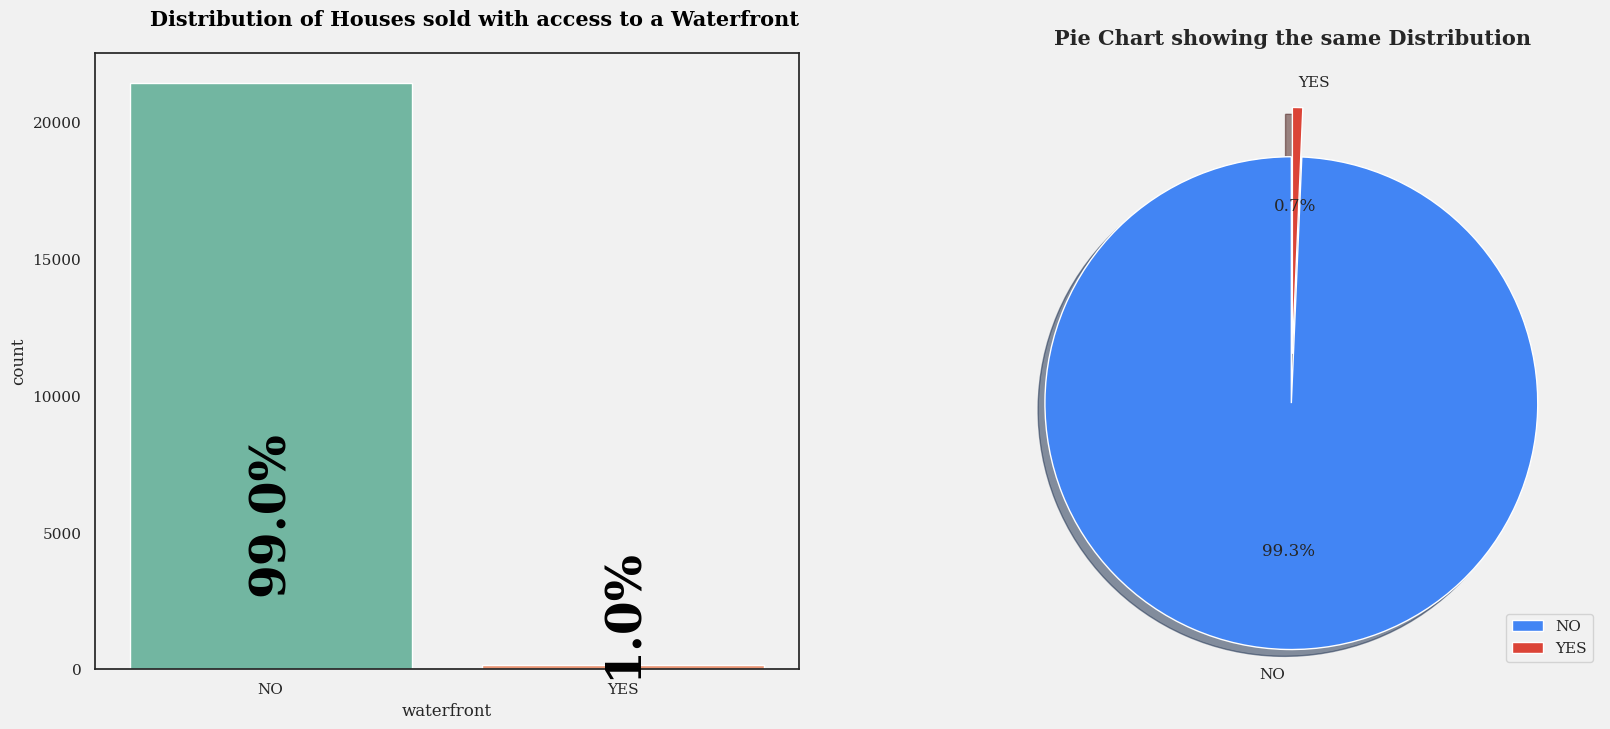

In [33]:
plt.style.background = 'white'

colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='waterfront', data=df, palette='Set2')

for i in ax.patches:
  ax.text(x = i.get_x()+i.get_width()/2, y = i.get_height()/7, s = f"{np.round(i.get_height()/len(df)*100.0)}%", ha = 'center', size = 35, weight = 'bold', rotation = 90, color = 'black')
plt.title('Distribution of Houses sold with access to a Waterfront', fontsize = 15, weight = 'bold', font = 'Serif', color = 'black', loc = 'right', pad = 20)


plt.subplot(1, 2, 2)
sizes = df['waterfront'].value_counts()
colors = ['#4285F4', '#DB4437']
labels = ['NO', 'YES']
explode = [0.17, 0.03]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart showing the same Distribution', fontsize = 15, weight = 'bold')

# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()


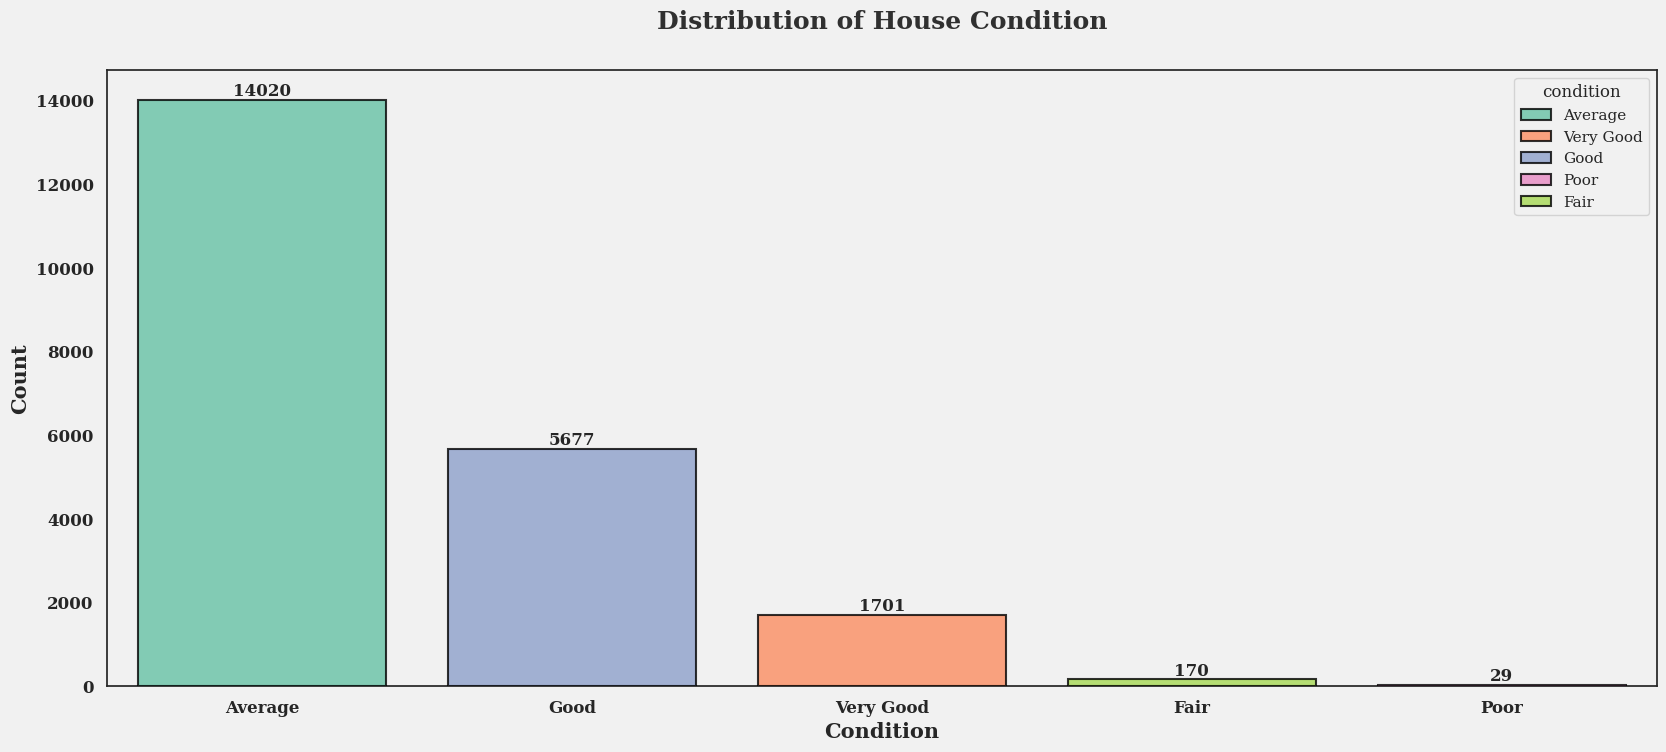

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x='condition', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='condition', order=df['condition'].value_counts().index, dodge=False)
plt.title('Distribution of House Condition', fontsize=18, fontweight='bold', font='Serif', color='black', loc='center', pad=30, alpha=0.8)
plt.xlabel('Condition', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['condition'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)
    
# add names as annotations to the plot

plt.show()

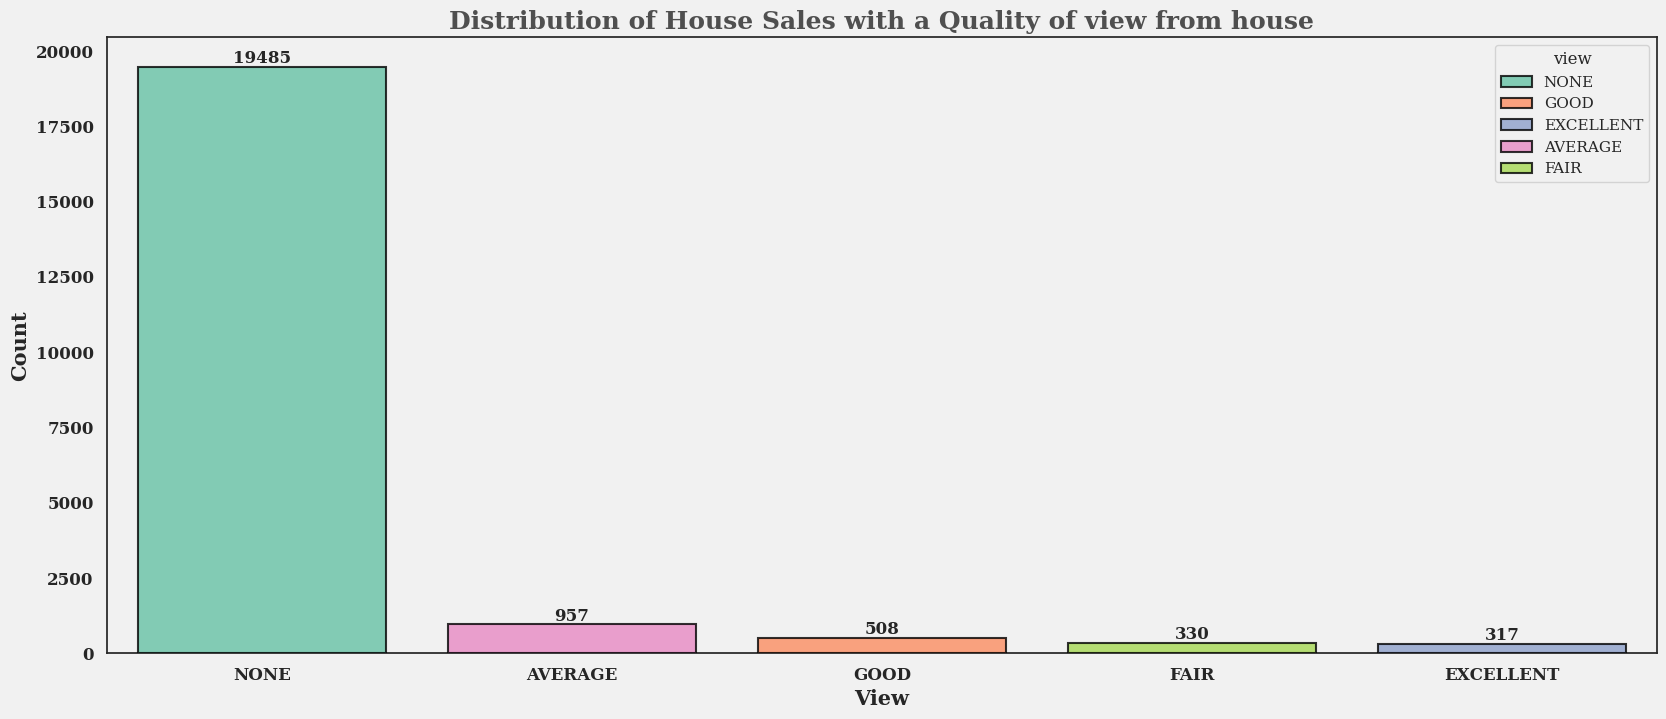

In [35]:
plt.figure(figsize=(20, 8))
sns.countplot(x='view', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='view', order=df['view'].value_counts().index, dodge=False)
plt.title('Distribution of House Sales with a Quality of view from house', fontsize=18, fontweight='bold', font='Serif',alpha=0.8)
plt.xlabel('View', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['view'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)

plt.show()

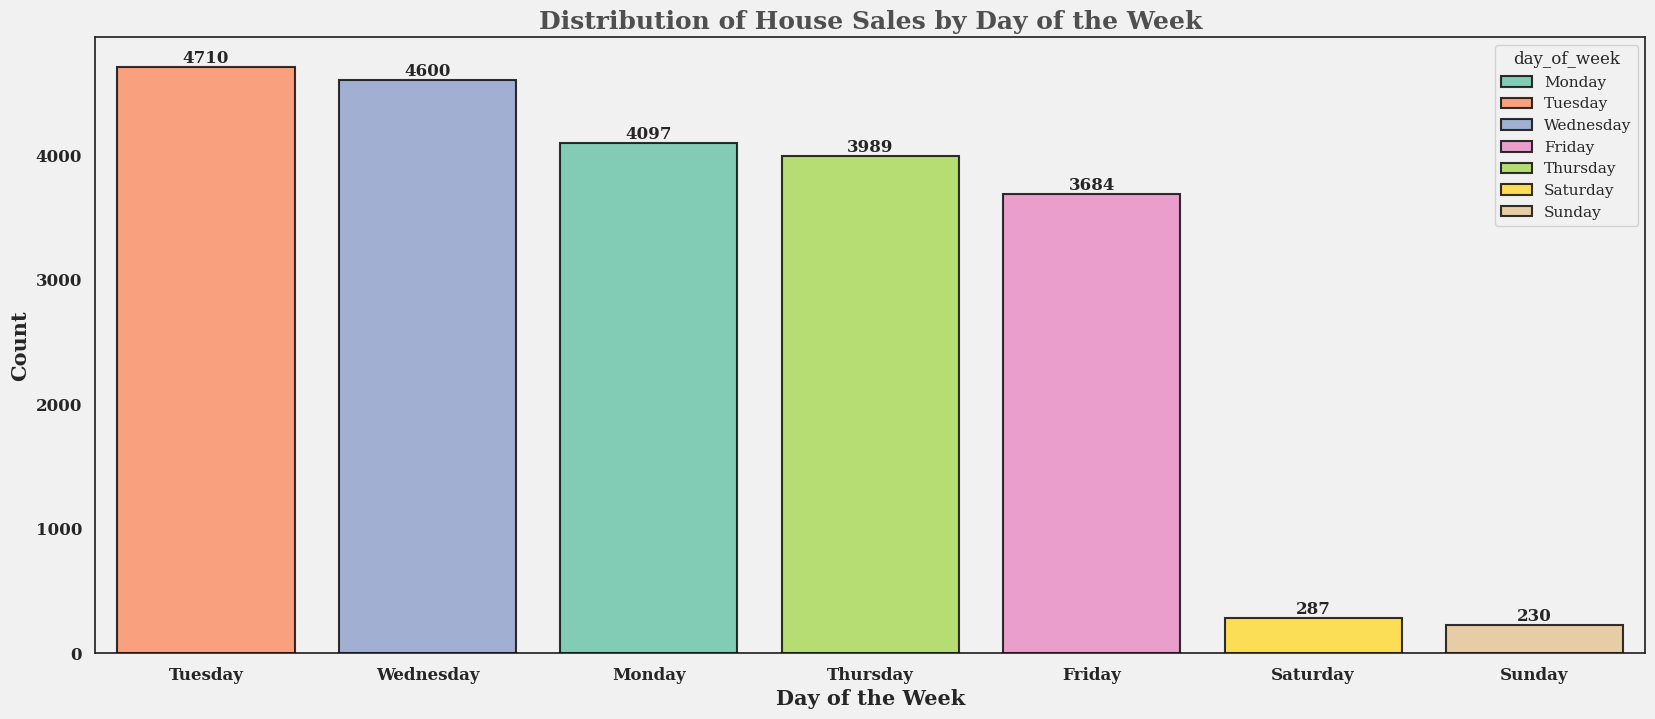

In [36]:
plt.figure(figsize=(20, 8))
sns.countplot(x='day_of_week', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='day_of_week', order=df['day_of_week'].value_counts().index, dodge=False)
plt.title('Distribution of House Sales by Day of the Week', fontsize=18, fontweight='bold', font='Serif',alpha=0.8)
plt.xlabel('Day of the Week', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['day_of_week'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)

plt.show()

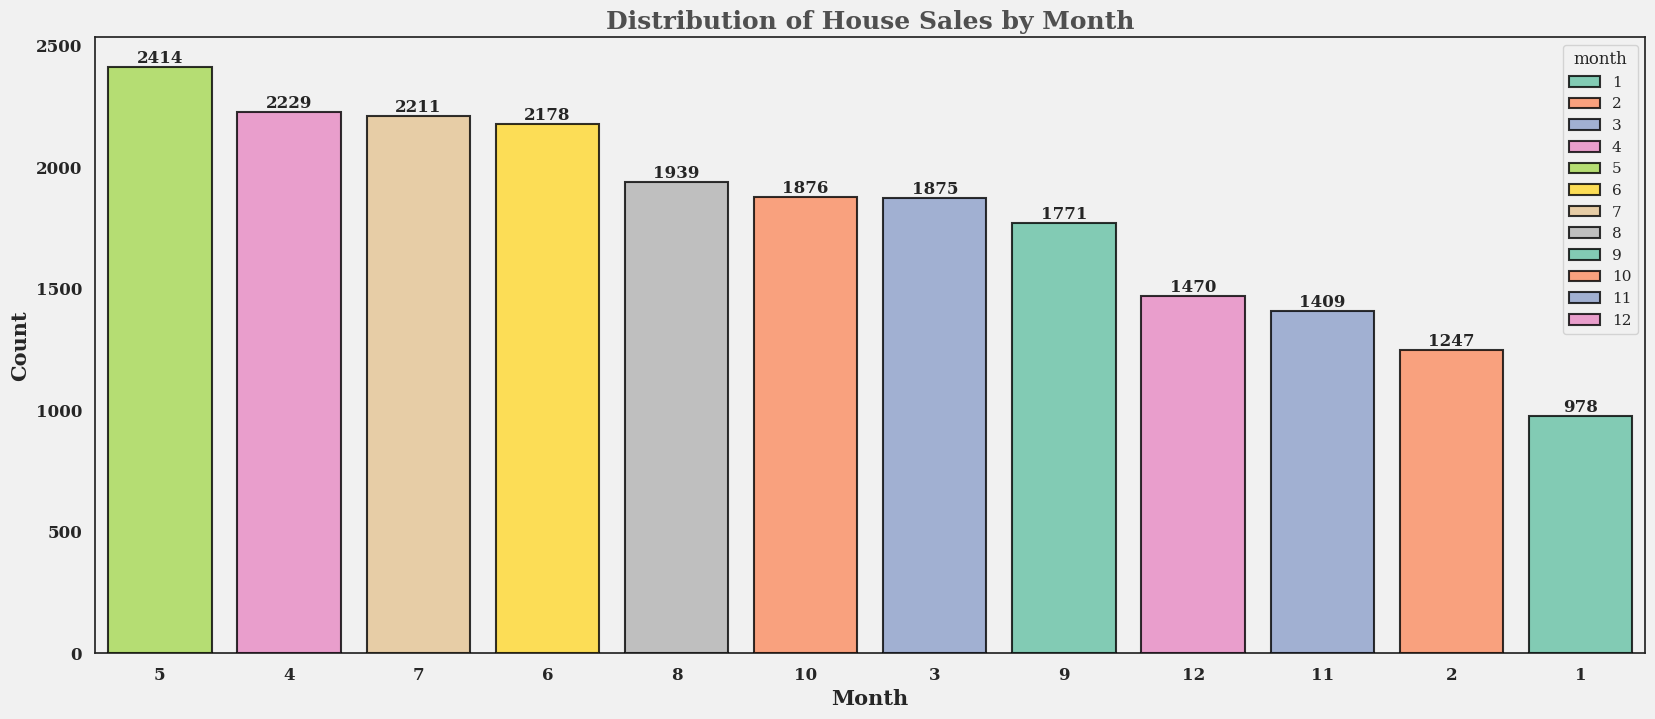

In [37]:
# a count of the number of houses sold per month
plt.figure(figsize=(20, 8))
sns.countplot(x='month', data=df, palette='Set2', edgecolor='black', linewidth=1.5, saturation=1, alpha=0.8, zorder=3, hue='month', order=df['month'].value_counts().index, dodge=False)
plt.title('Distribution of House Sales by Month', fontsize=18, fontweight='bold', font='Serif',alpha=0.8)
plt.xlabel('Month', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# Add names as annotations
for index, value in enumerate(df['month'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', font='Serif', fontsize=12)

plt.show()

In [38]:
df['is_renovated'].value_counts() / len(df) * 100 * 100 / 100 # 100 / 100 to get 2 decimal places

0   96.56
1    3.44
Name: is_renovated, dtype: float64

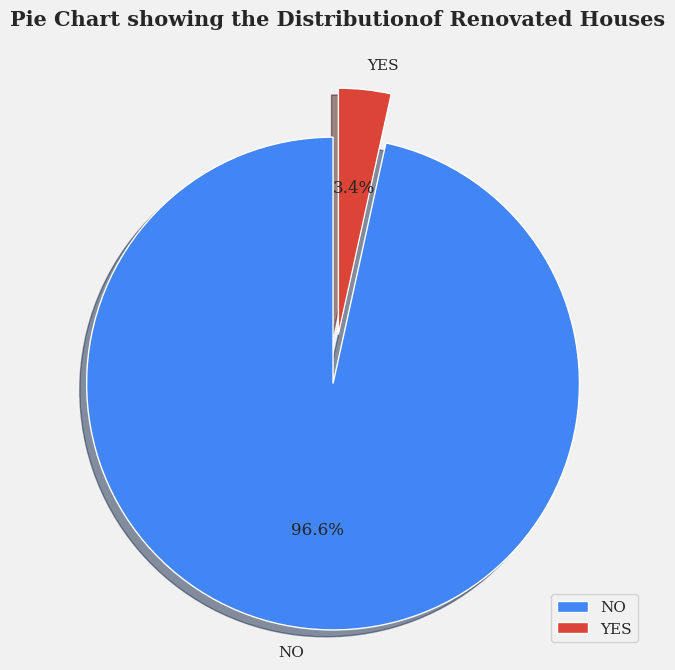

In [39]:
plt.figure(figsize=(20, 8))
# pie chart for the distribution of is_renovated
sizes = df['is_renovated'].value_counts()
colors = ['#4285F4', '#DB4437']
labels = ['NO', 'YES']
explode = [0.17, 0.03]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors=colors ,explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart showing the Distributionof Renovated Houses', fontsize = 15, weight = 'bold')

# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()

## <font color='white'>3.2 Bivariate Data analysis</font>

**Distribution of the target variable by numeric features**

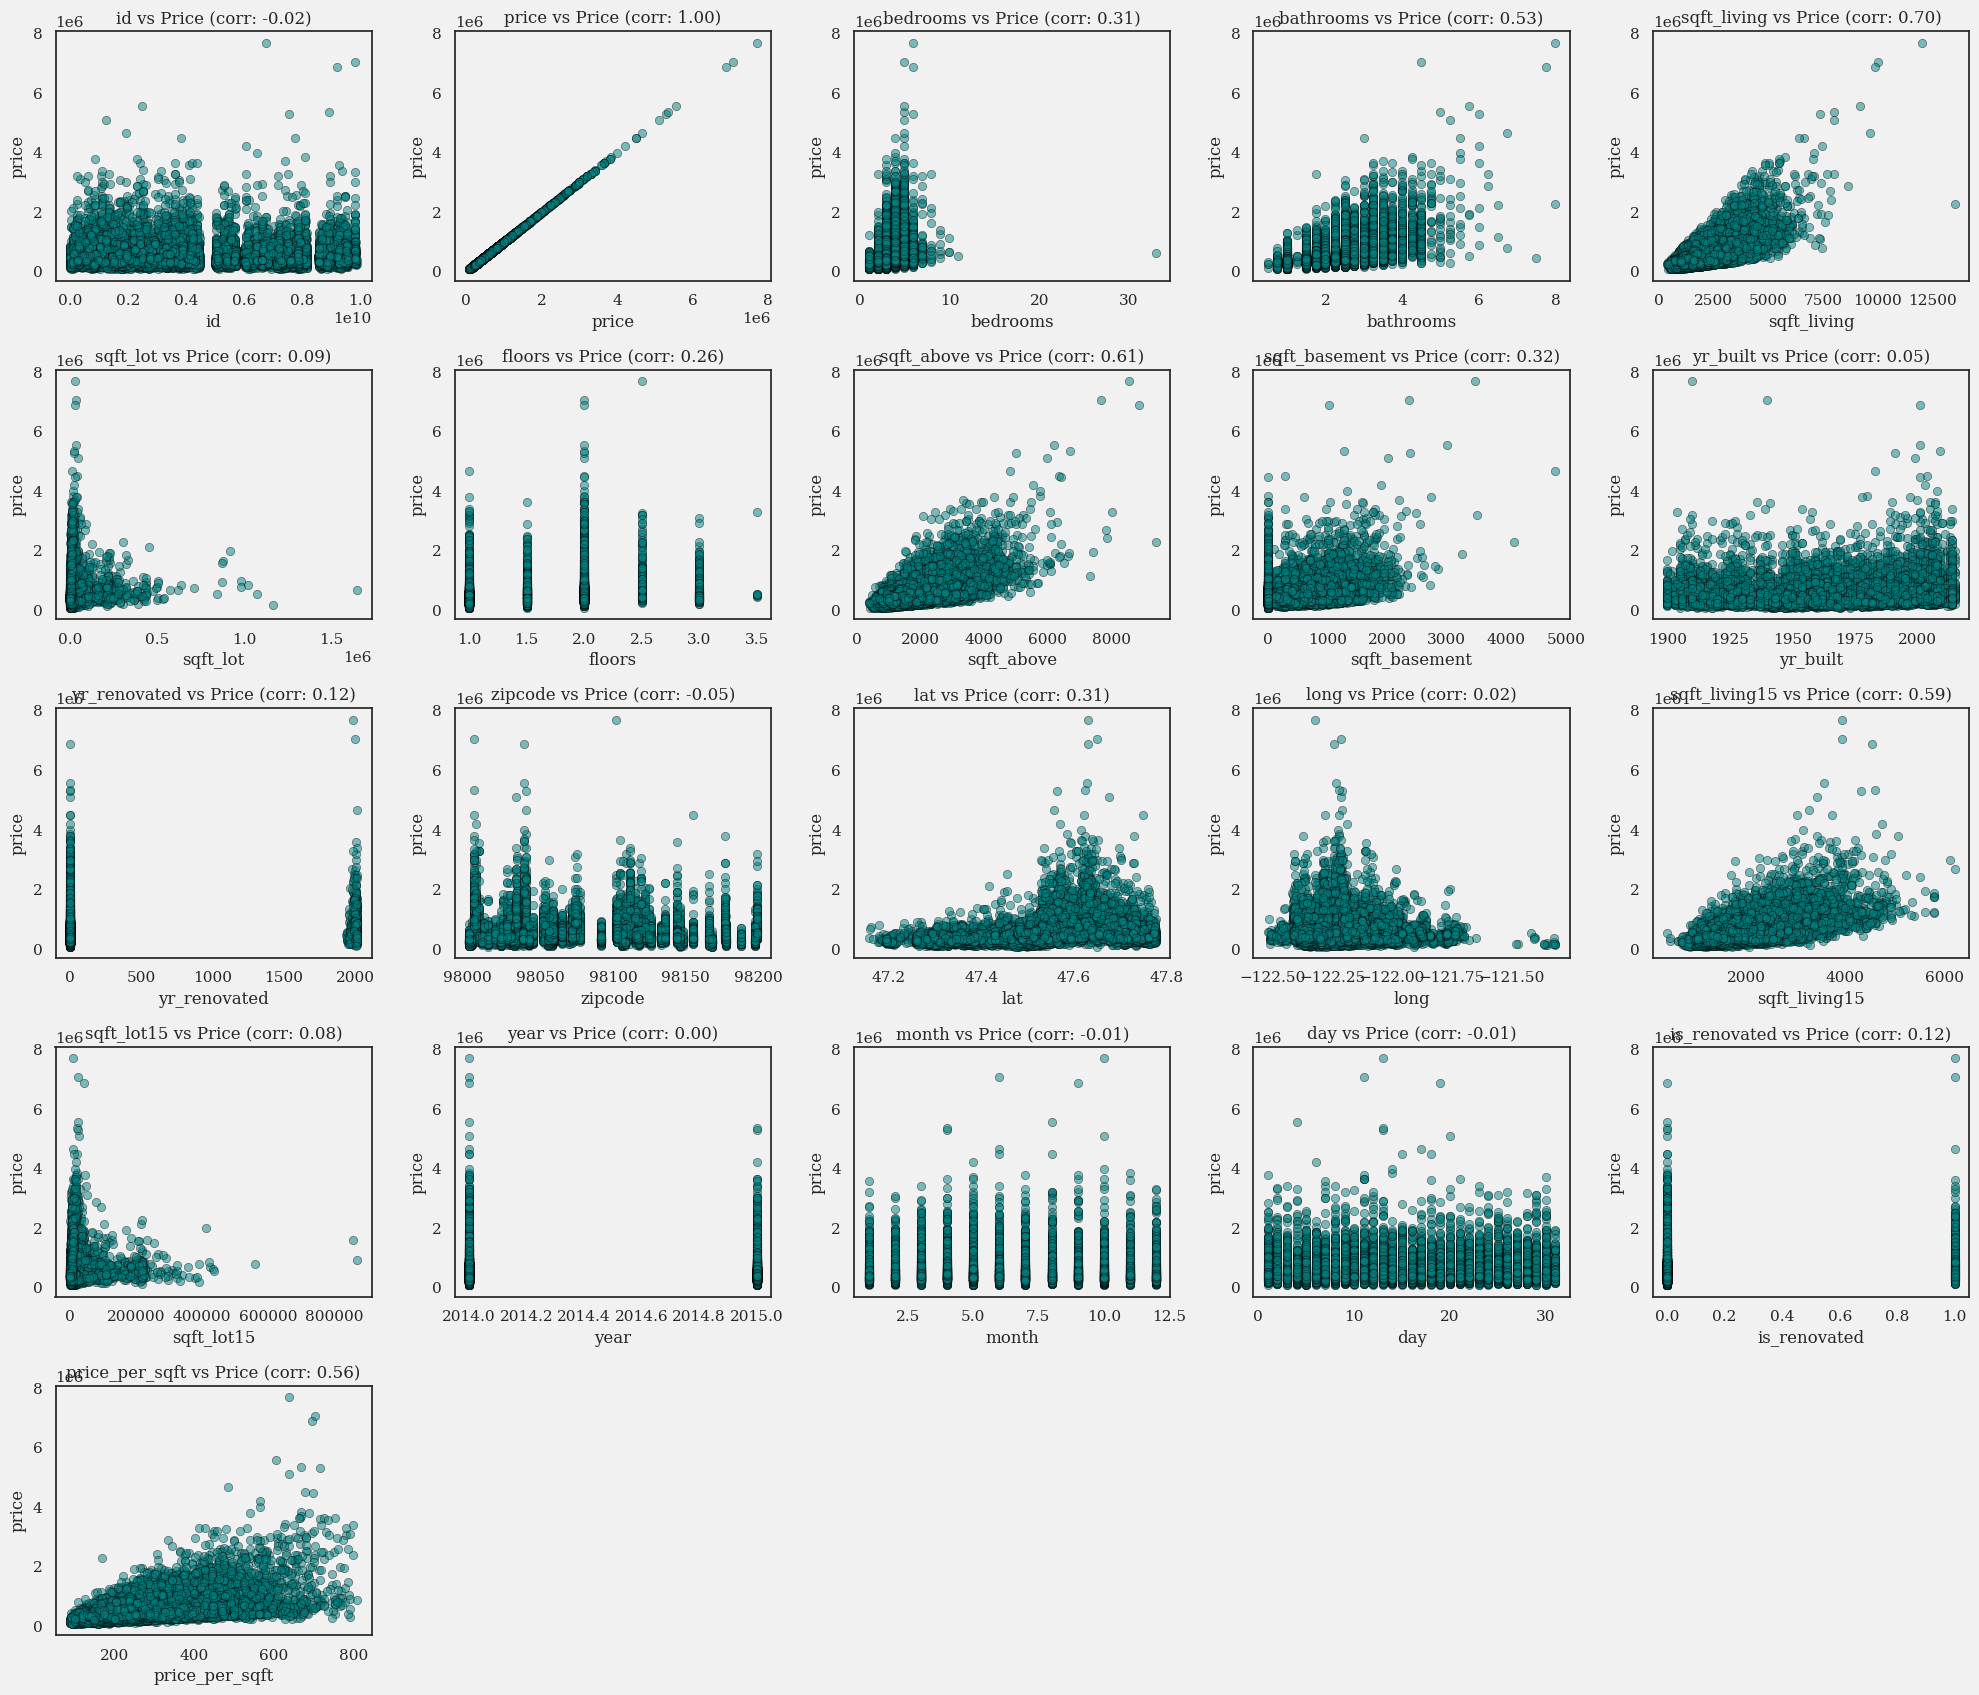

In [40]:
# Get list of columns to plot against target
cols = df.columns.tolist()

# Reomve the string columns
cols.remove('view')
cols.remove('waterfront')
cols.remove('day_of_week')
cols.remove('grade')
cols.remove('condition')

# Filter the columns that are currently in the dataframe
cols = [col for col in cols if col in df.columns]

# Create subplots
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.flatten()

# Loop through each column and plot against target
for i, col in enumerate(cols):
    # Calculate correlation between feature and target
    corr = df['price'].corr(df[col])
    
    # Scatter plot with regression line
    sns.scatterplot(x=col, y='price', data=df, ax=axs[i], alpha=0.5, marker='o', edgecolor='k', color='teal', linewidth=0.5, zorder=3,)
    plt.gca().set_facecolor('#e6e6e6')
    
    # Add title with correlation coefficient
    title = f"{col} vs Price (corr: {corr:.2f})"
    axs[i].set_title(title)

# Remove unused subplots
for i in range(len(cols), len(axs)):
    fig.delaxes(axs[i])

# Show plot
plt.tight_layout()
plt.show()


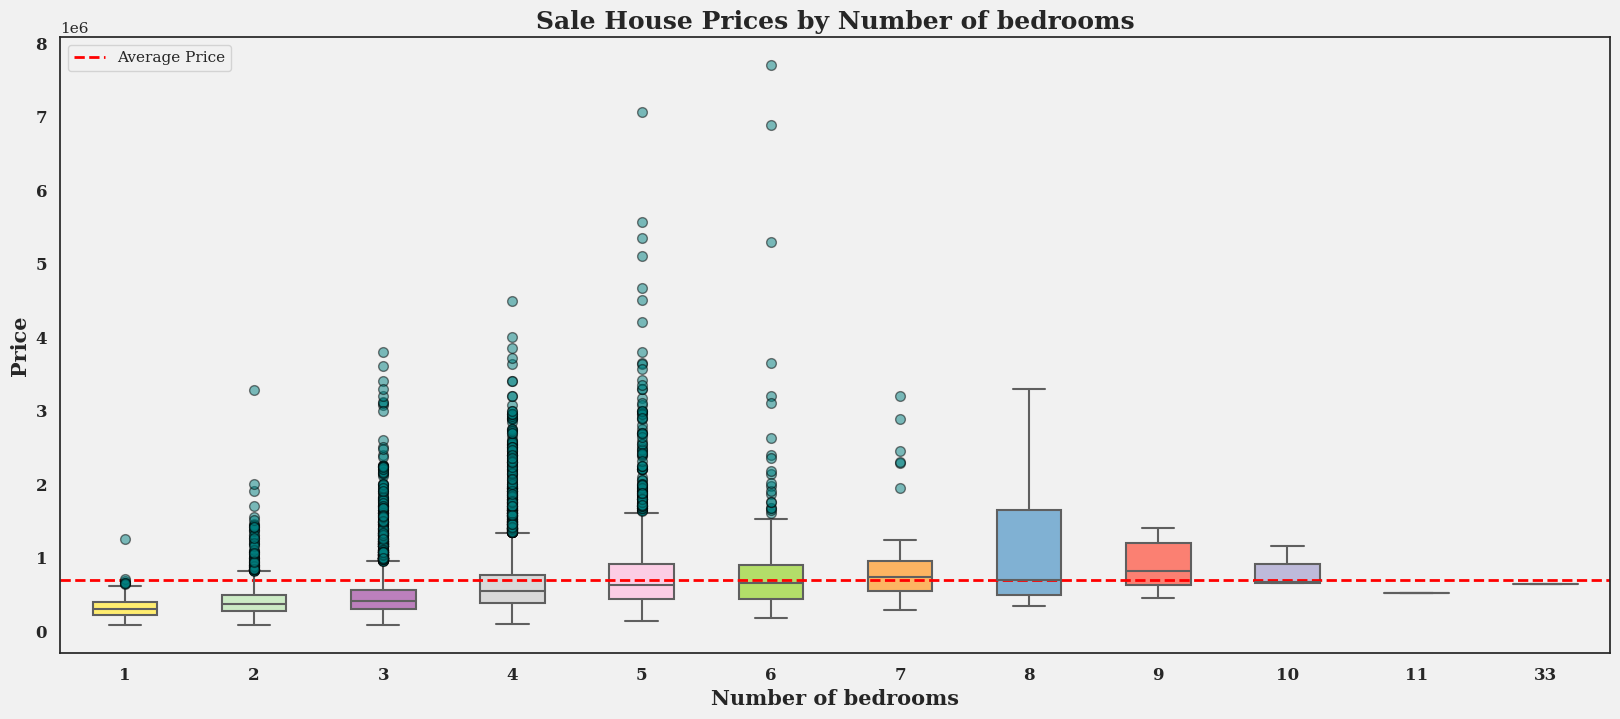

In [41]:
# use the average price and shw it in the box plot
plt.figure(figsize=(20, 8))

# use a group by statement to calculate the average price per number of bedrooms
avg_price_per_bedroom = df.groupby('bedrooms')['price'].mean().reset_index()

# plot the average price per number of bedrooms in a box plot
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set3_r', linewidth=1.5, width=0.5, zorder=3, saturation=1, flierprops=dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5))



# set the title of the plot
plt.title('Sale House Prices by Number of bedrooms', fontsize=18, fontweight='bold', font='Serif')

# set the x and y labels
plt.xlabel('Number of bedrooms', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Price', fontsize=15, fontweight='bold', font='Serif')

# set the x and y ticks
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')

# set the x and y limits
# plt.xlim(0, 11)
# plt.ylim(0, 1000000)

# add the average price per number of bedrooms as a horizontal line
plt.axhline(y=avg_price_per_bedroom['price'].mean(), color='red', linestyle='--', linewidth=2, label='Average Price')

# add a legend
plt.legend(loc='upper left')

# show the plot
plt.show()




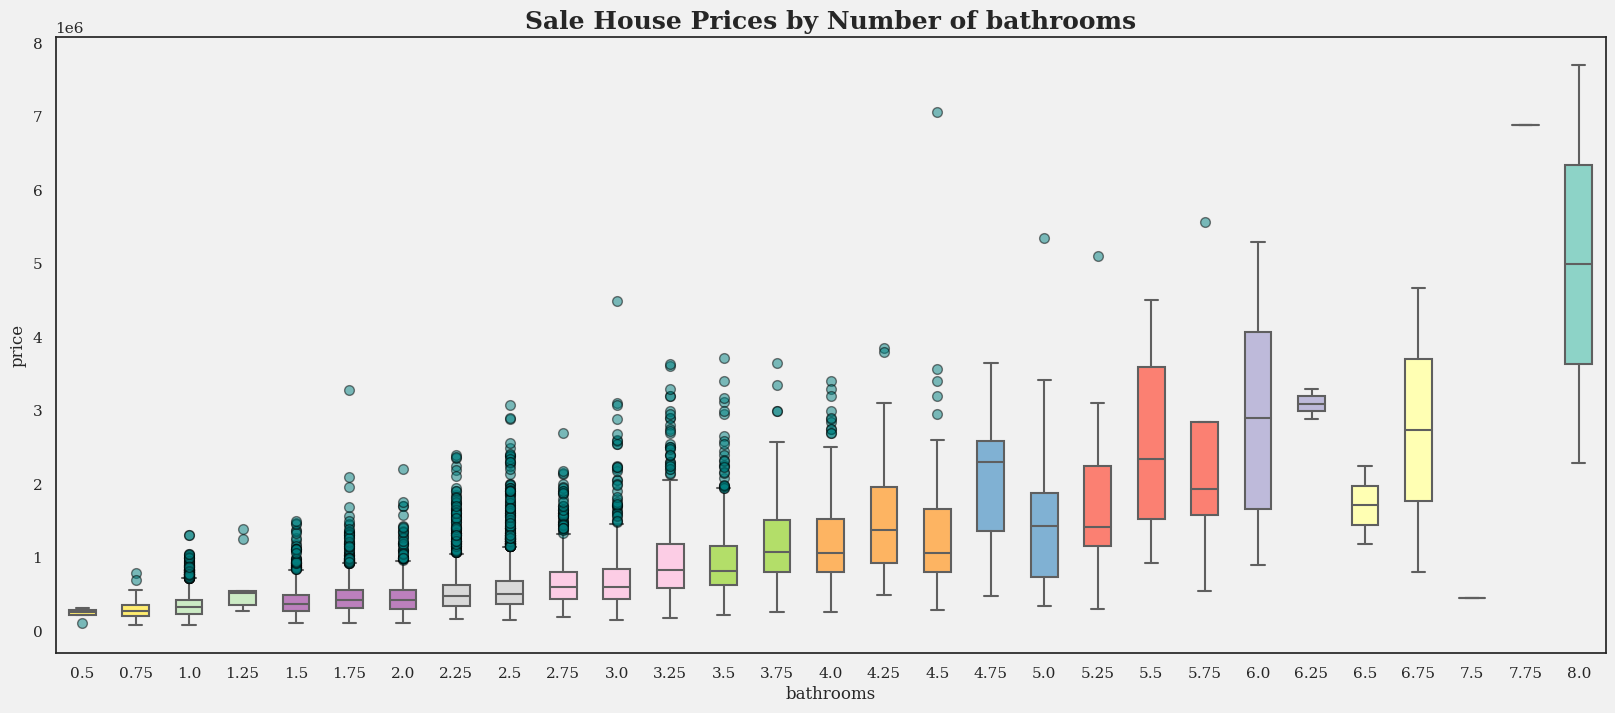

In [42]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='bathrooms', y='price', data=df, palette='Set3_r', linewidth=1.5, width=0.5, zorder=3, saturation=1, flierprops=dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5))
plt.title('Sale House Prices by Number of bathrooms', fontsize=18, fontweight='bold', font='Serif')
plt.show()


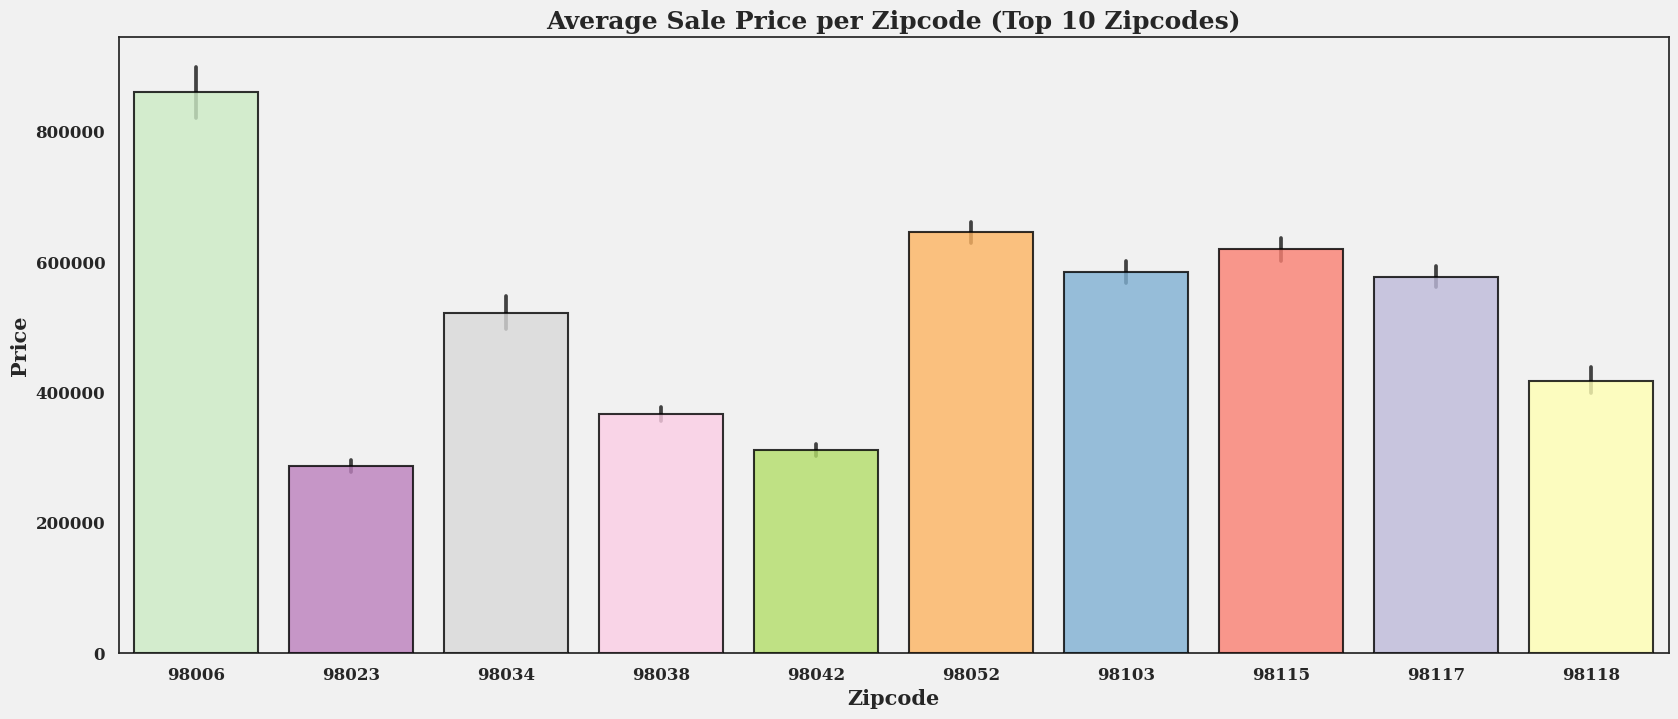

In [43]:

top_10_zipcodes = df['zipcode'].value_counts().sort_values(ascending=False).head(10).index
plt.figure(figsize=(20, 8))
sns.barplot(x='zipcode', y='price', data=df[df['zipcode'].isin(top_10_zipcodes)], palette='Set3_r', linewidth=1.5, zorder=3, saturation=1, edgecolor='black', alpha=0.8, estimator=np.mean)
plt.title('Average Sale Price per Zipcode (Top 10 Zipcodes)', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Zipcode', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Price', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')
plt.show()

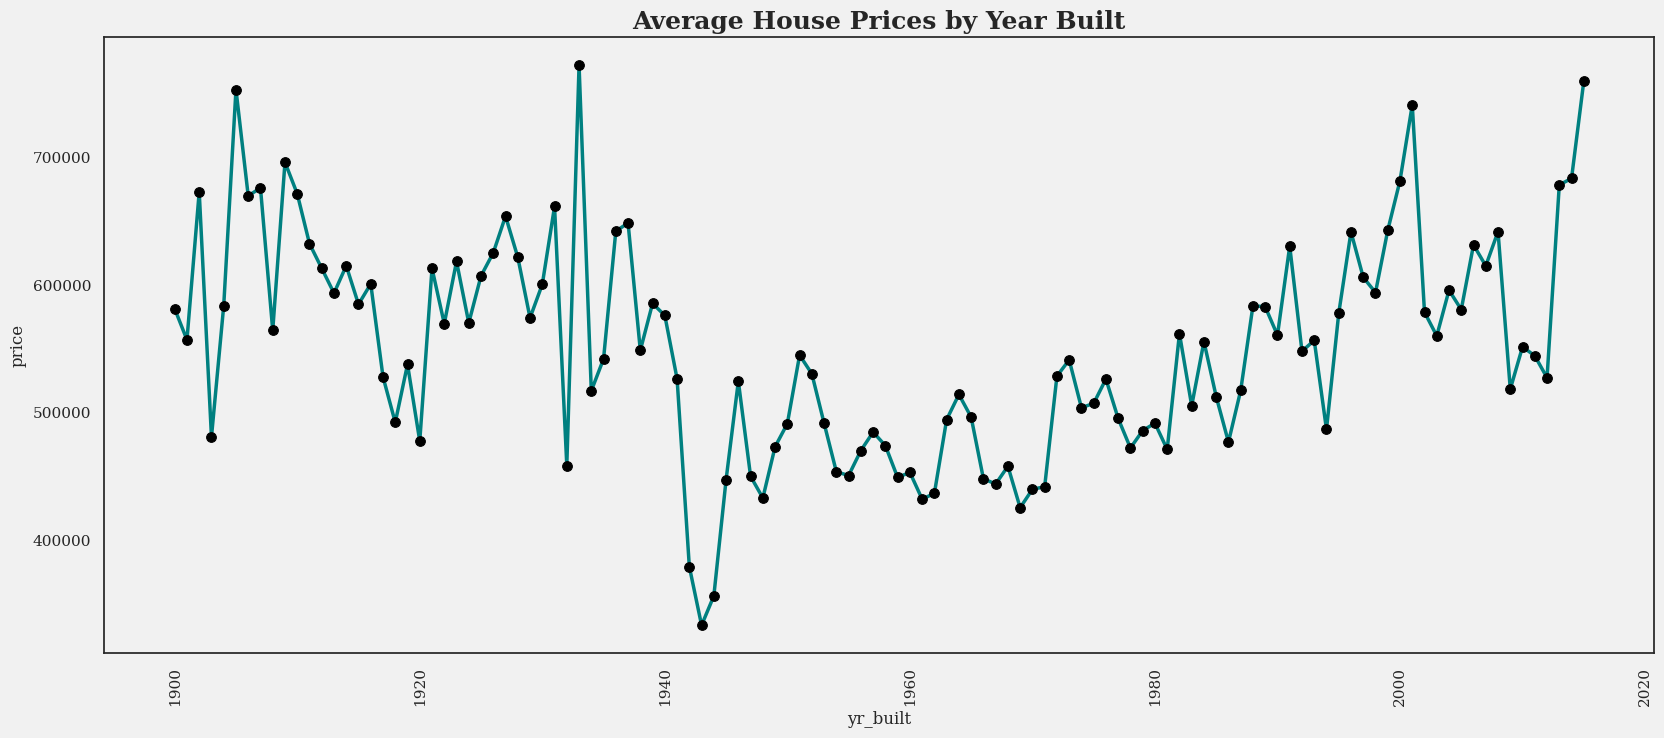

In [44]:
# average price per yr_built
plt.figure(figsize=(20, 8))
sns.lineplot(x='yr_built', y='price', data=df, estimator = np.mean, ci=None, color='teal', linewidth=2.5, marker='o', markerfacecolor='black', markersize=7, markeredgecolor='black')
plt.xticks(rotation=90)
plt.title('Average House Prices by Year Built', fontsize=18, fontweight='bold', font='Serif')
plt.show()


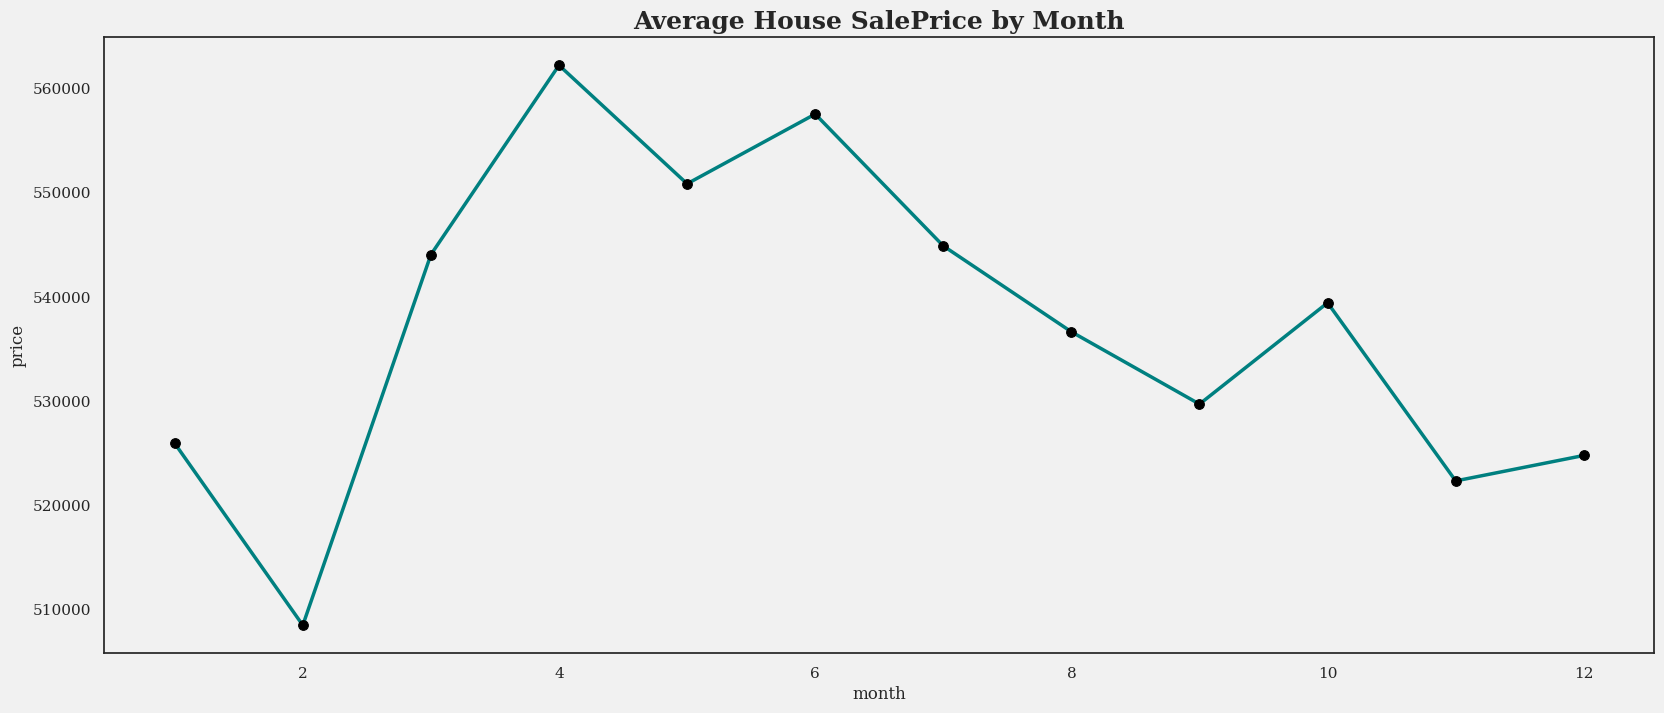

In [45]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='month', y='price', data=df, ci=None, color='teal', linewidth=2.5, marker='o', markerfacecolor='black', markersize=7, markeredgecolor='black', estimator=np.mean)
plt.title('Average House SalePrice by Month', fontsize=18, fontweight='bold', font='Serif')
plt.show()

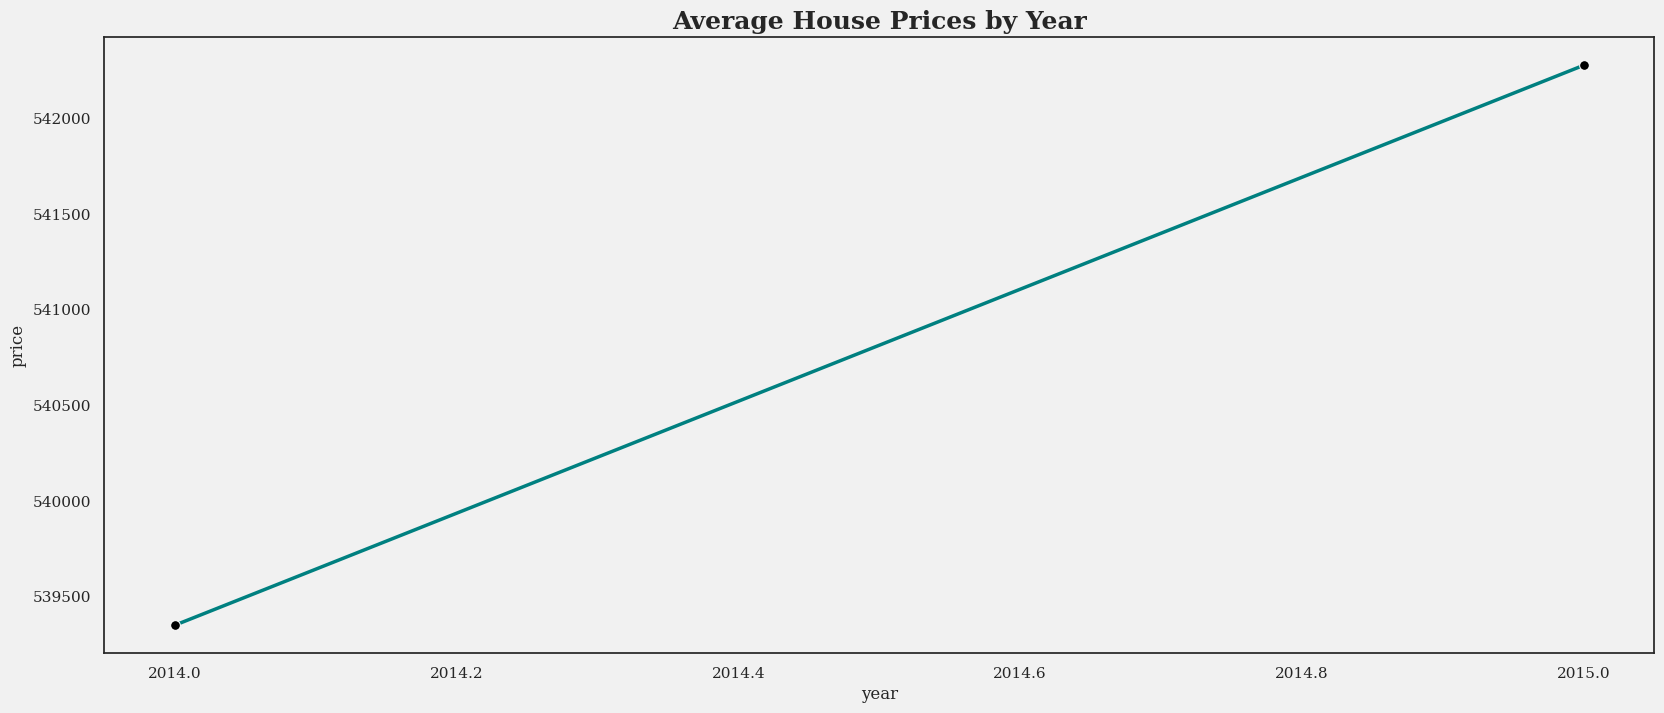

In [46]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='year', y='price', data=df, ci=None, color='teal', linewidth=2.5, marker='o', markerfacecolor='black', markersize=7, estimator=np.mean)
plt.title('Average House Prices by Year', fontsize=18, fontweight='bold', font='Serif')
plt.show()

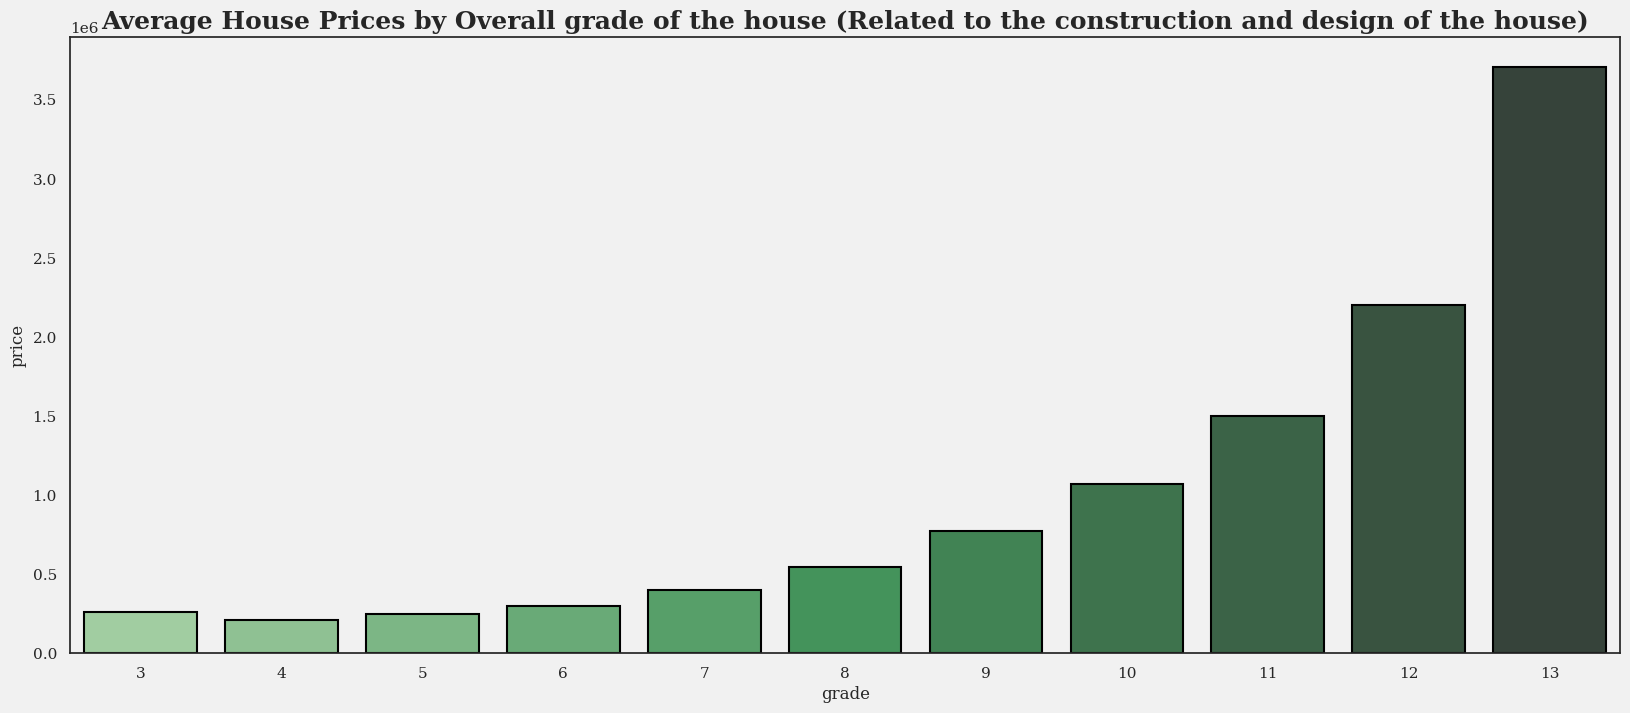

In [47]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='grade', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75)
plt.title('Average House Prices by Overall grade of the house (Related to the construction and design of the house)', fontsize=18, fontweight='bold', font='Serif')



plt.show()

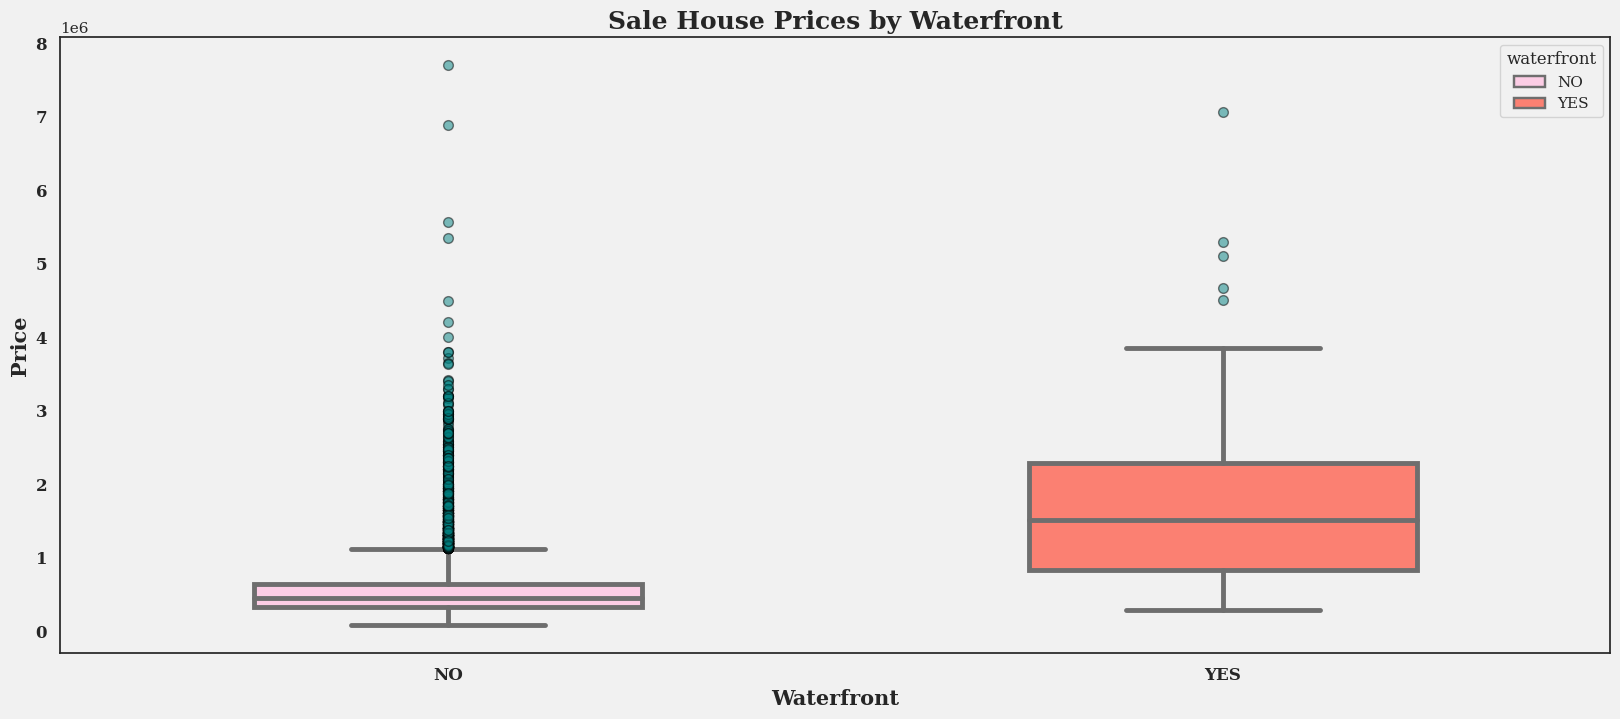

In [48]:
# avrega price per waterfront using a boxplot with a hue of waterfront
plt.figure(figsize=(20, 8))
sns.boxplot(x='waterfront', y='price', data=df, palette='Set3_r', linewidth=3.5, width=0.5, zorder=3, saturation=1, flierprops=dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='teal', alpha=0.5), hue='waterfront', dodge=False)
plt.title('Sale House Prices by Waterfront', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Waterfront', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Price', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')
plt.show()

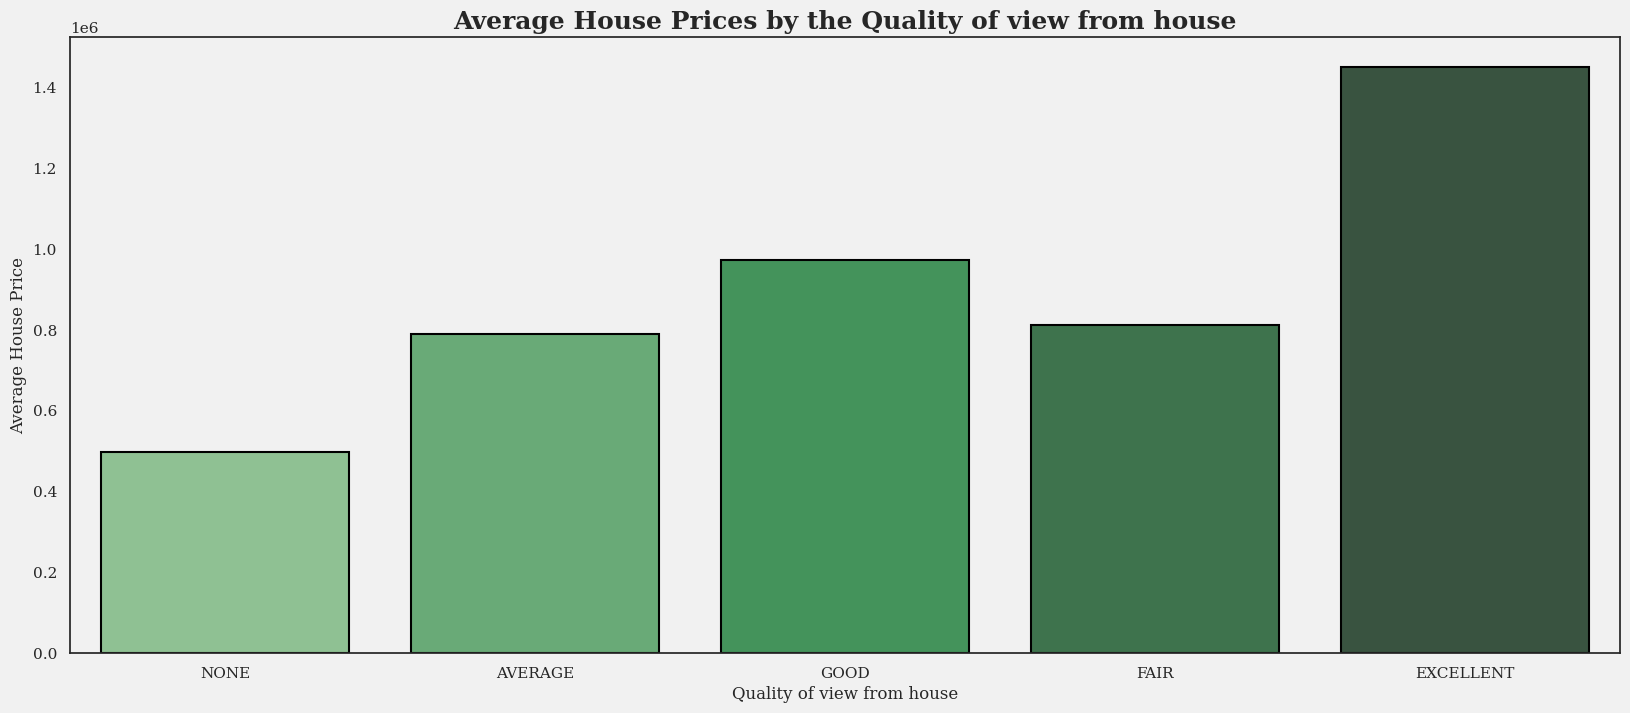

In [49]:
plt.figure(figsize=(20, 8))
sns.barplot(x='view', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75, order=df['view'].value_counts().index)
plt.title('Average House Prices by the Quality of view from house', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Quality of view from house')
plt.ylabel('Average House Price')
plt.show()




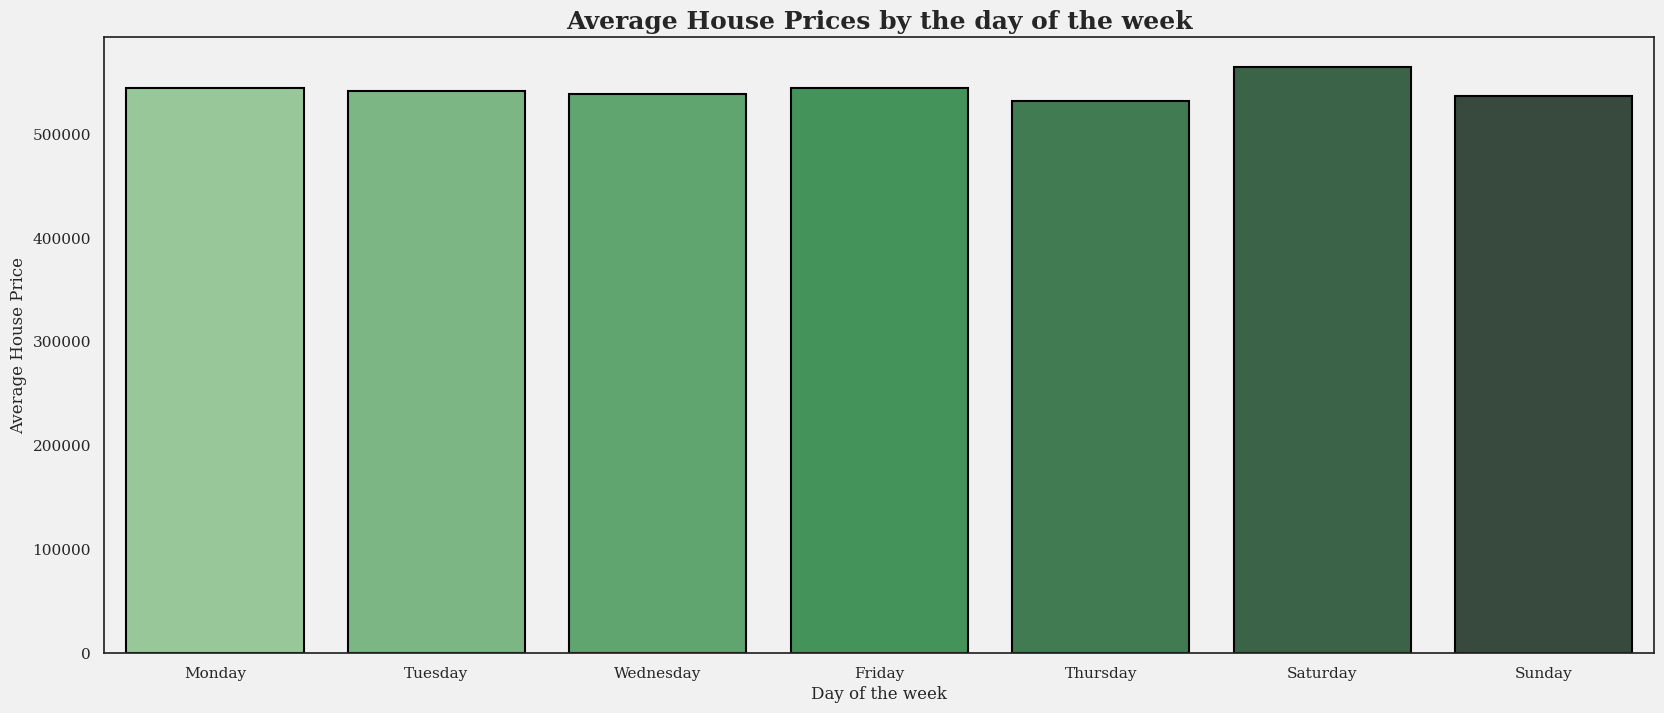

In [50]:
# Which day of the week is the best to sell a house?
plt.figure(figsize=(20, 8))
sns.barplot(x='day_of_week', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75)
plt.title('Average House Prices by the day of the week', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Day of the week')
plt.ylabel('Average House Price')


plt.show()

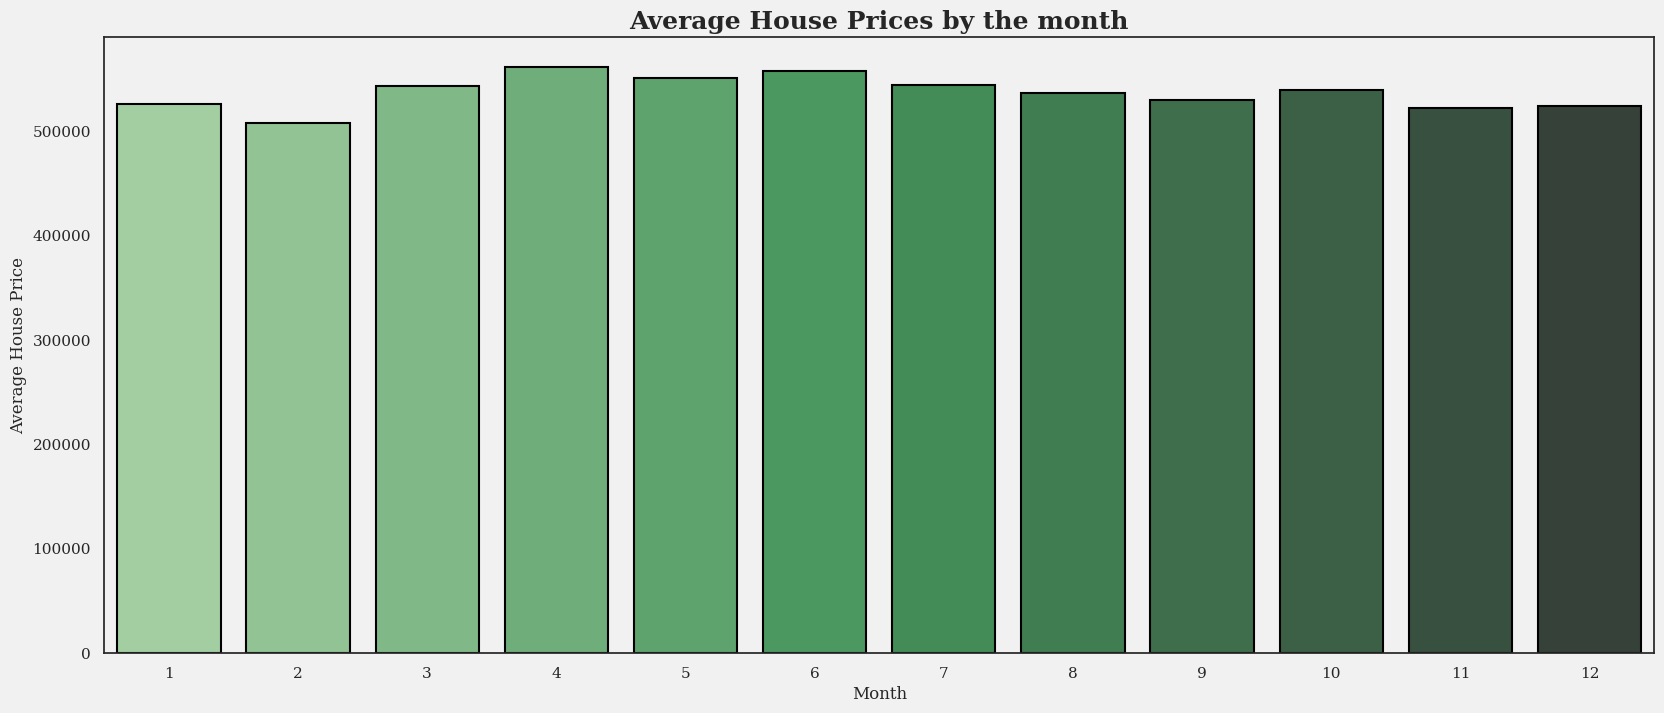

In [51]:
# Which month is the best to sell a house?
plt.figure(figsize=(20, 8))
sns.barplot(x='month', y='price', data=df, estimator=np.mean, ci=None, palette='Greens_d', linewidth=1.5, edgecolor='black', capsize=0.1, errcolor='black', errwidth=1.5, saturation=0.75)
plt.title('Average House Prices by the month', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Month')
plt.ylabel('Average House Price')
plt.show()


In [111]:
# Create a map scatterbox that shows the location of the houses in df
fig = px.scatter_mapbox(
    df, lat="lat", 
    lon="long", 
    color="price", 
    size="price", 
    color_continuous_scale=px.colors.cyclical.IceFire, 
    size_max=15, 
    zoom=10
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

## 3.3 Multivariate Analysis

### 3.3.1 Checking for Correlation among the variables

In [53]:
# correlations
df_corr = df.corr()
df_corr["price"].sort_values(ascending=False)

price             1.00
sqft_living       0.70
grade             0.67
sqft_above        0.61
sqft_living15     0.59
price_per_sqft    0.56
bathrooms         0.53
sqft_basement     0.32
bedrooms          0.31
lat               0.31
floors            0.26
yr_renovated      0.12
is_renovated      0.12
sqft_lot          0.09
sqft_lot15        0.08
yr_built          0.05
long              0.02
year              0.00
month            -0.01
day              -0.01
id               -0.02
zipcode          -0.05
Name: price, dtype: float64

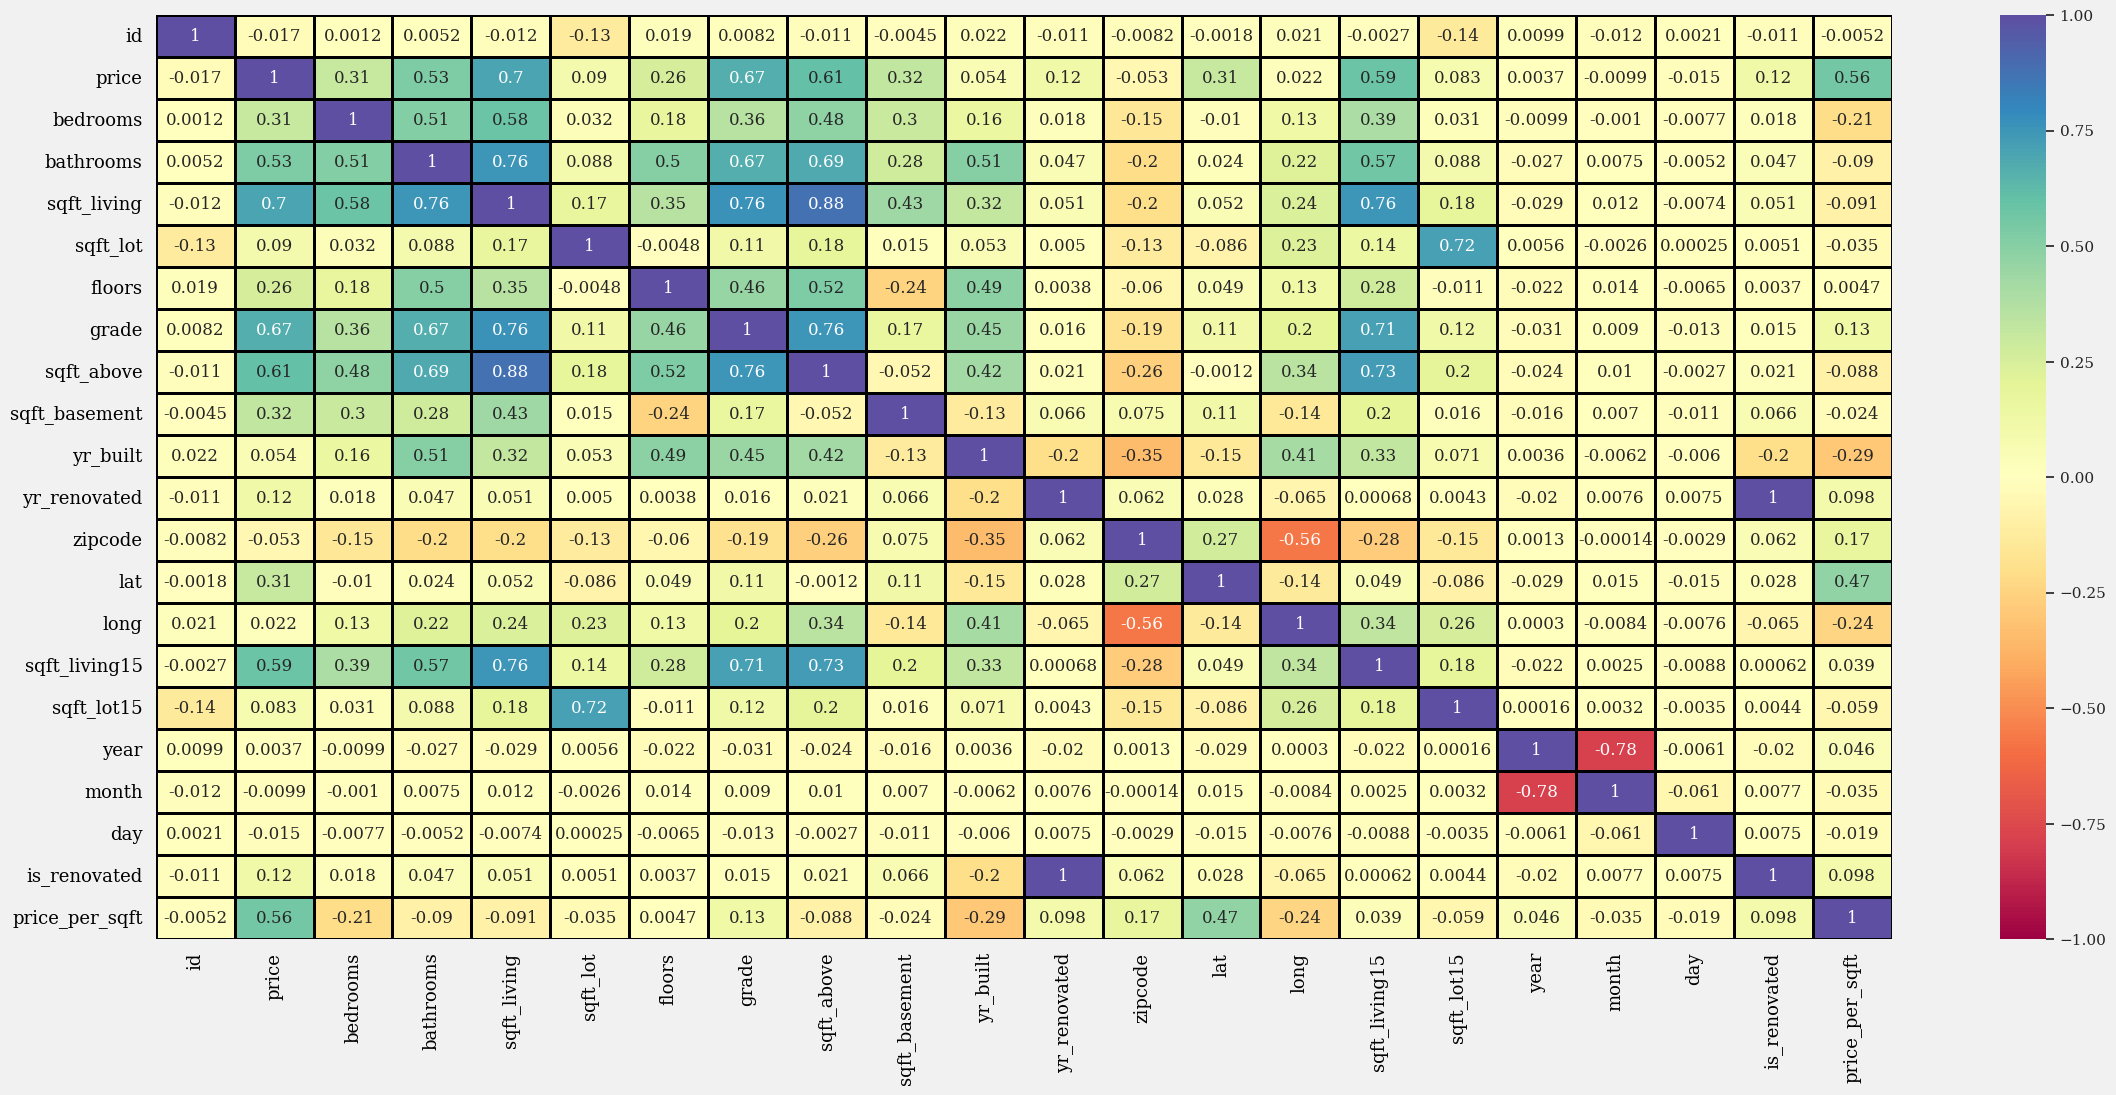

In [54]:
plt.figure(figsize = (28,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

### 3.3.2 Checking for Multicolinerarity using Variance Inflation Factor

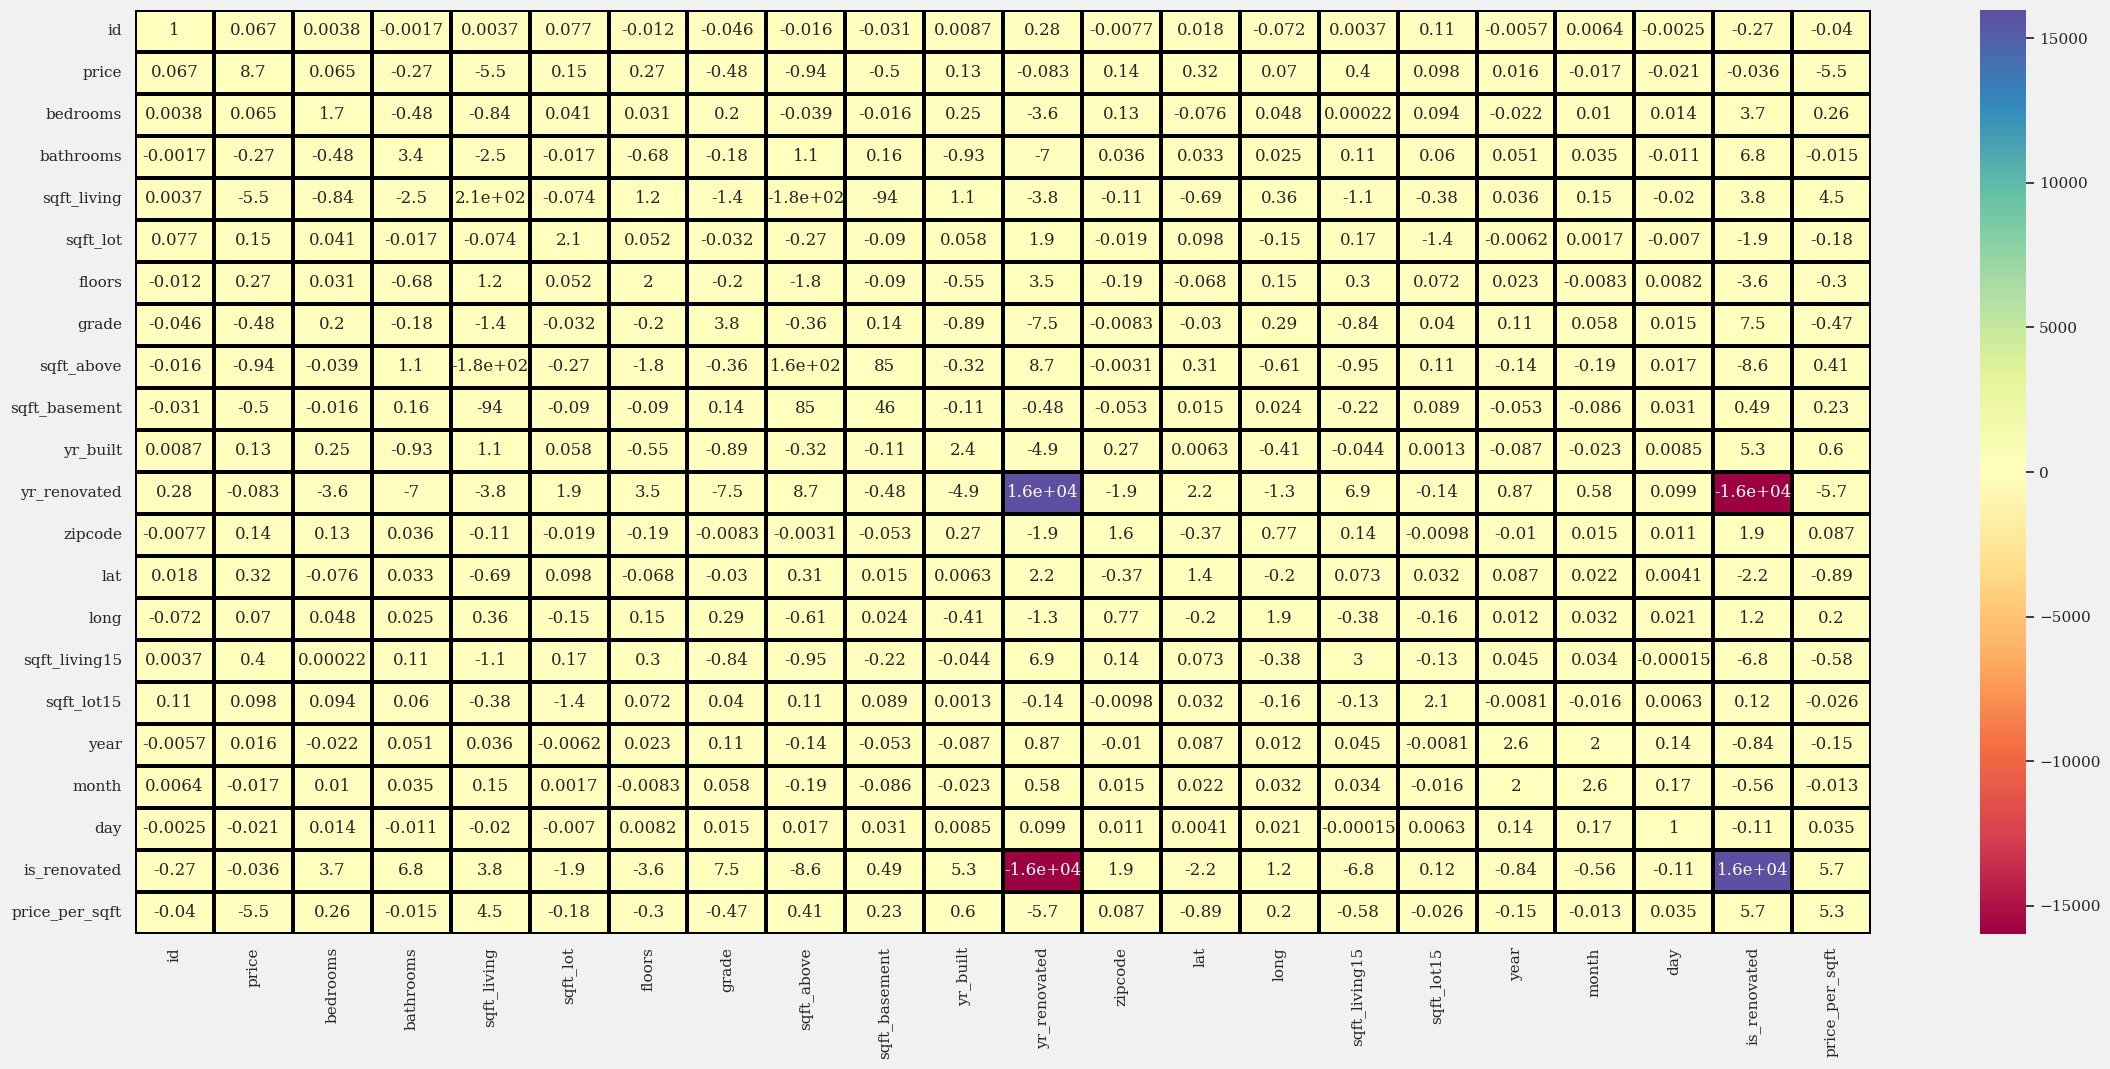

In [55]:
vif = pd.DataFrame(np.linalg.inv(df_corr.values), index = df_corr.index, columns=df_corr.columns)

# plt.style.use("ggplot")
plt.figure(figsize = (28,12))
sns.heatmap(vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

**Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.**

**Insights:**

- sqft_basement has a VIF score of 46. This is a very high score and indicates that this variable is highly correlated with other variables in the dataset. This is not surprising since the sqft_basement is a subset of the sqft_living variable. We will drop this variable from the dataset.

- is_renovated has a VIF score of 16000. This is a very high score and indicates that this variable is highly correlated with other variables in the dataset. This is not surprising since the is_renovated is a subset of the yr_renovated variable. We will drop this variable from the dataset.

- yr_renovated also has a VIF score of 16000. This is a very high score and indicates that this variable is highly correlated with other variables in the dataset. We will drop this variable from the dataset.

- price_per_sqft has a VIF score of 5.3. This is a high score and indicates that this variable is highly correlated with other variables in the dataset. We will drop this variable from the dataset.

### 3.3.3 Test for Multicolinerarity

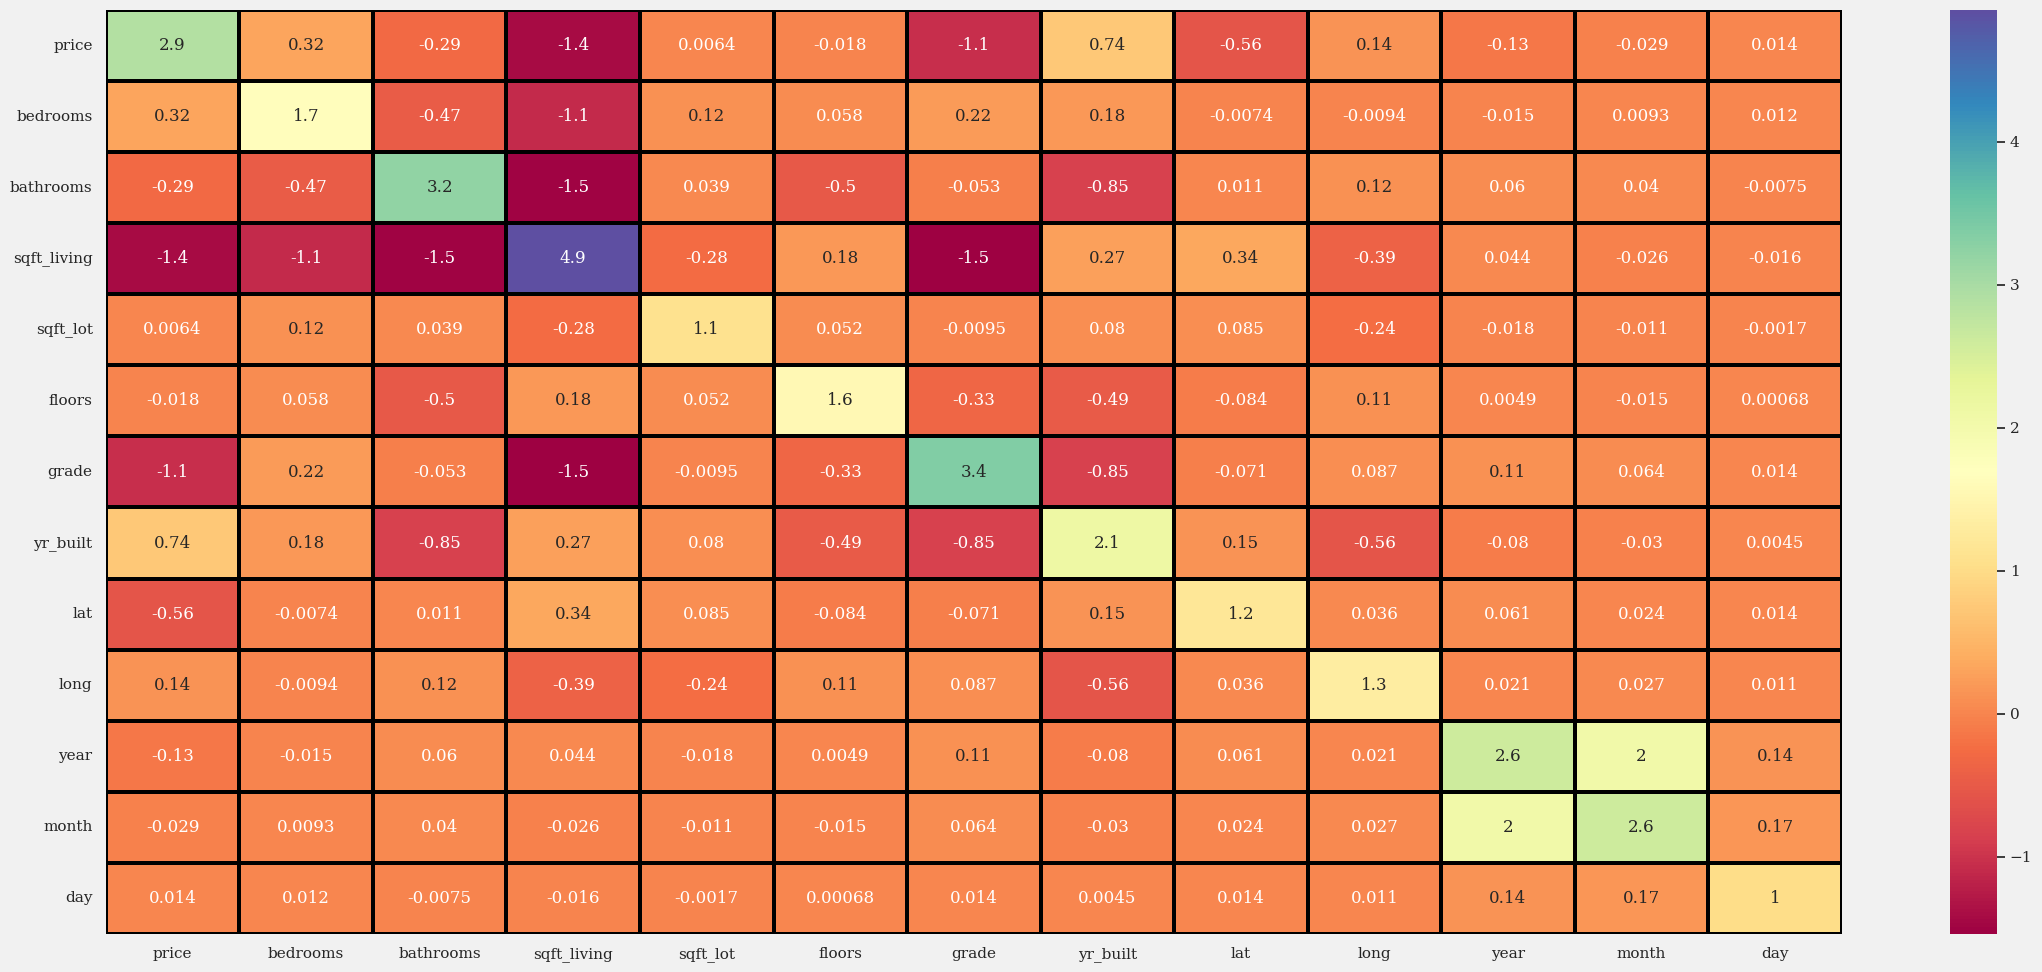

In [56]:
df.drop(columns=['id', 'zipcode','sqft_basement', 'is_renovated', 'yr_renovated', 'price_per_sqft', 'sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True)


# # get the VIF score
new_corr = df.corr()
new_vif = pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

# # plot the VIF score
plt.figure(figsize = (28,12))
sns.heatmap(new_vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black')

plt.show()

In [57]:
# Define the mapping of categories to numerical values
mapping = {'NONE':0, 'AVERAGE':1, 'GOOD':2, 'FAIR':3, 'EXCELLENT':4}

# Apply the mapping to the "view" column
df['view'] = df['view'].map(mapping)

In [58]:
# Define the mapping of categories to numerical values
condition_mapping = {'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}

# Apply mapping to column
df['condition'] = df['condition'].map(condition_mapping)

In [59]:
# Define the mapping of categories to numerical values
mapping = {'NO':0, 'YES':1}

# Apply the mapping to the "view" column
df['waterfront'] = df['waterfront'].map(mapping)

In [60]:
# Define the mapping of categories to numerical values
condition_mapping = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Apply mapping to column
df['day_of_week'] = df['day_of_week'].map(condition_mapping)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  int64  
 7   view         21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
 13  year         21597 non-null  int64  
 14  month        21597 non-null  int64  
 15  day          21597 non-null  int64  
 16  day_of_week  21597 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 2.8 MB


# <font color='goldenrod'>4. Modelling</font>

### 4.1   Create a Baseline model

In [62]:
from statsmodels.formula.api import ols
simple_formula = "price ~ sqft_living"
simple_model = ols(formula=simple_formula, data=df).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:07:36   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 4.1.1.1   Interpreting the Baseline Model Metrics

- **The R-squared value of the model is `0.493`, which means that approximately `49.3%` of the variation in the dependent variable `(price)` can be explained by the independent variable `(sqft_living)`. The remaining `50.7%` could be attributed to other factors not included in this model.**

- **With a p-value of `0.000`, the model is statistically significant.**

- **Omnibus/Prob(Omnibus): This tests the null hypothesis that the residuals are normally distributed. The Omnibus statistic is `14801.942` with a p-value of `0.000`, suggesting that the residuals are not normally distributed.**

- **Condition Number: The condition number is large `(5.63e+03)`, which might indicate strong multicollinearity or other numerical problems.**

#### 4.1.1.2   Interpreting the Baseline Model Parameters

- **`Coefficients:` The coefficient for sqft_living is `280.8630` with a standard error of `1.939`. This suggests that for every unit increase in sqft_living, we can expect an average increase of `280.8630` units in price. The p-value is `0.000`, which is less than `0.05`, indicating a statistically significant relationship.**

- **`Intercept:` The intercept is `-4.399e+04` with a standard error of `4410.023`, which means when sqft_living is zero, the expected value of price would be `-4.399e+04`.**

### 4.2  Building a Multiple Linear Regression Model using Ordinary Least Squares

In [63]:
# Set formula with SalePrice as target and all other columns as features
multiple_formula = 'price ~ ' + ' + '.join(df.columns.drop('price'))

# Create and fit model
multiple_model = ols(multiple_formula, data=df).fit()

# Get summary 
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3076.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:07:36   Log-Likelihood:            -2.9456e+05
No. Observations:               21597   AIC:                         5.892e+05
Df Residuals:                   21580   BIC:                         5.893e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.04e+08   9.73e+06    -10.693      

#### 4.2.1   Interpreting the Model Metrics

- **R-squared: This is 0.695, which means that about 69.5% of the variance in the dependent variable (price) can be explained by the independent variables in the model.**

- **F-statistic and Prob (F-statistic): The F-statistic tests whether at least one predictor variable has a non-zero coefficient. A low p-value (here, 0.00) rejects the null hypothesis that all predictor coefficients are zero, meaning at least some predictors are significant.**

- **P>|t|: This is the p-value associated with each predictor. A small p-value (typically ≤ 0.05) indicates strong evidence that the predictor is a meaningful addition to the model. For example, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, yr_built, lat, long, and year are all statistically significant predictors. However day and day_of_week have p-values greater than the alpha value making them statistically insignificant predictors**

- **Condition Number: The condition number is large (3.11e+08), indicating potential issues with multicollinearity or other numerical problems.**

#### 4.2.2   Interpreting the Model Parameters

- **Coefficients: These values represent the change in the dependent variable for a one-unit change in the respective predictor, assuming all other predictors are held constant. For instance, for every additional bedroom (bedrooms), the price decreases by approximately $34,710.**

- **Intercept: -1.04e+08, which means that if all other predictors (like bedrooms, bathrooms, sqft_living, etc.) are zero, the predicted price of a house would be -1.04e+08.
However, in practice, the intercept often doesn’t have a meaningful interpretation, especially when it doesn’t make sense to have all predictors be zero (like in this case, a house cannot have zero bedrooms or zero square footage). It’s more useful in adjusting the model’s predictions to the scale of the dependent variable. It’s also worth noting that the p-value for the intercept is less than 0.05, indicating that it is statistically significant in this model.**

### 4.3  Iterate

The OLS regression results you provided indicate a few potential issues:

- `Multicollinearity:` The condition number is large (3.11e+08), which might indicate that there are strong multicollinearity or other numerical problems.

- `Insignificant Variables:` The p-values for sqft_lot, month, day, and day_of_week are greater than 0.05, suggesting that these variables are not statistically significant at the 5% level. In other words, changes in these predictors are not associated with changes in the dependent variable, price.

- `Model Fit:` The R-squared value is 0.695, indicating that about 69.5% of the variability in price can be explained by the model. While this isn’t necessarily a problem, it does suggest that there may be other variables not included in the model that could help explain more of the variability in price.

- `Residuals:` The Omnibus test is significant (p-value = 0.000), indicating that the residuals are not normally distributed. Additionally, the skewness and kurtosis values suggest that the residuals may not be normally distributed.

- `Outliers:` The Jarque-Bera (JB) test is significant (p-value = 0.000), suggesting that there may be outliers present in the data.

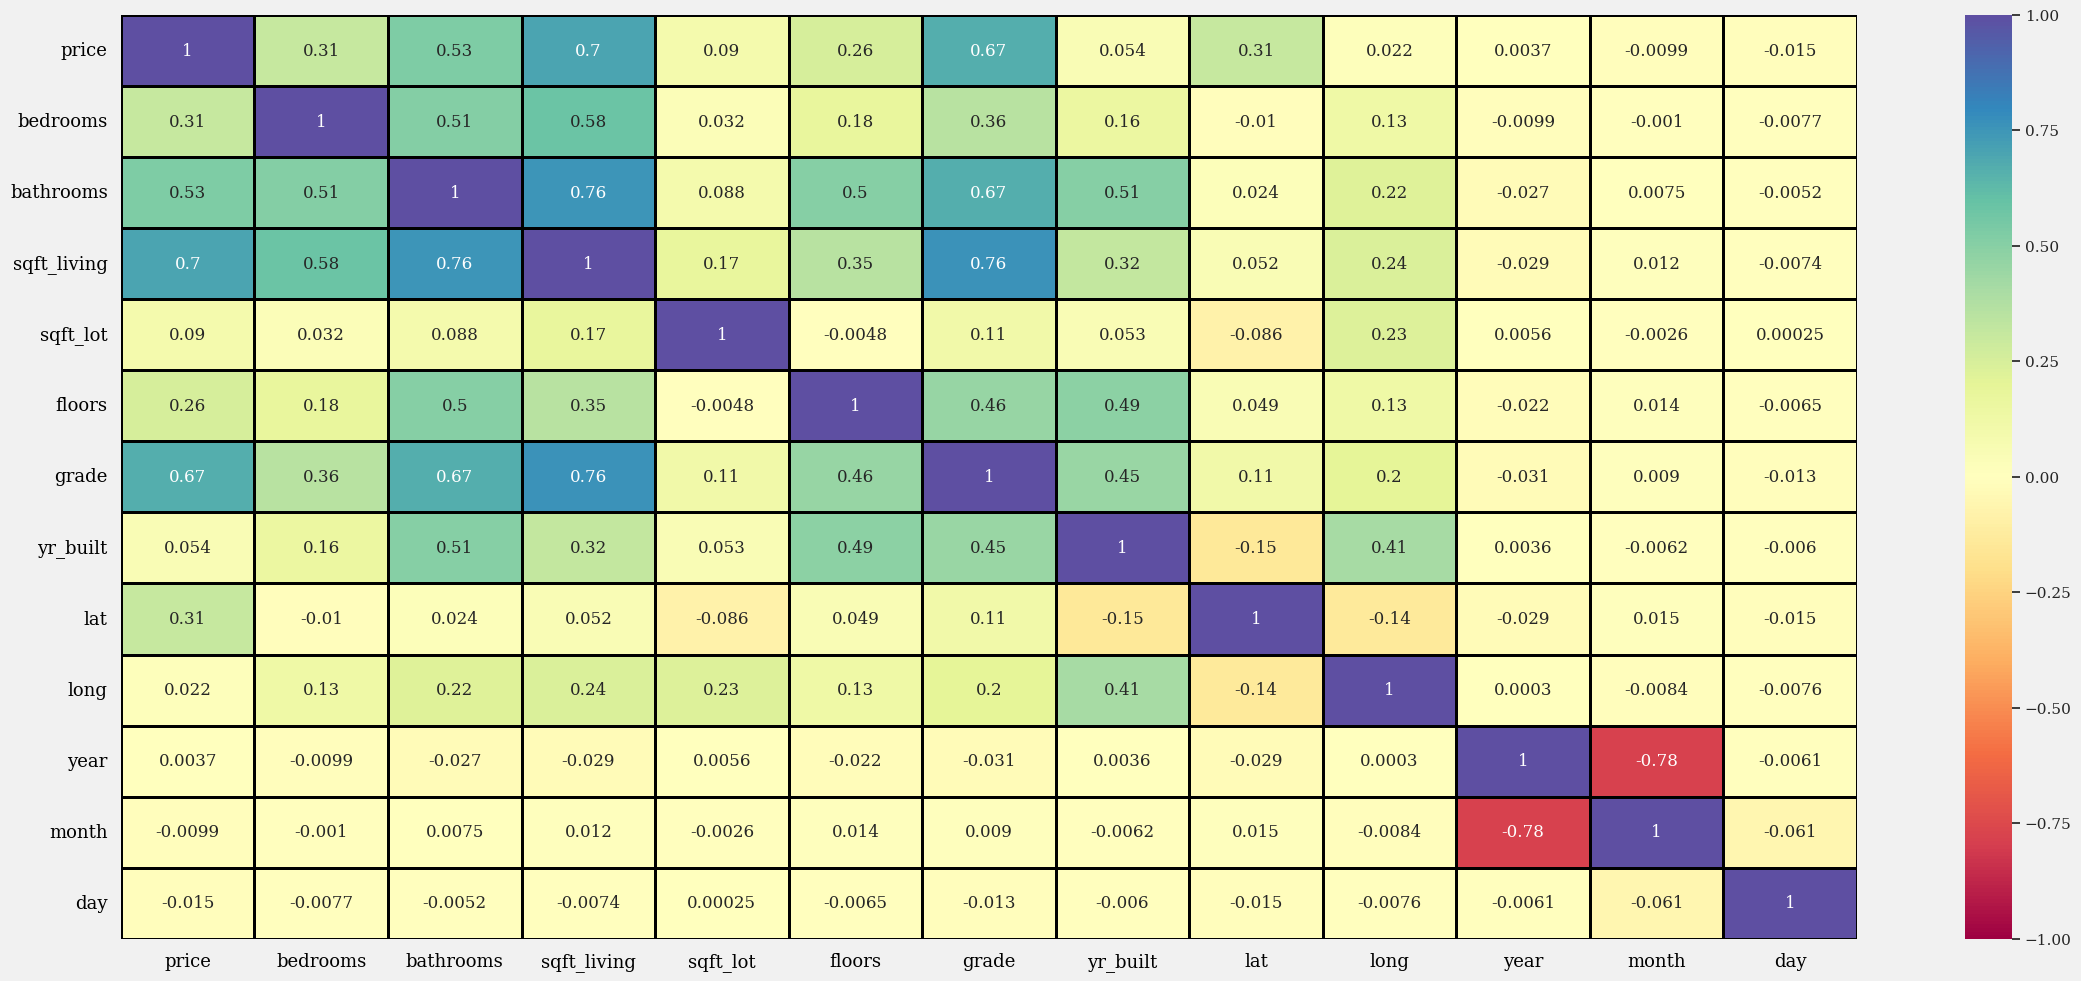

In [64]:
plt.figure(figsize = (28,12))
sns.heatmap(new_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral")
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

In [65]:
# remove the records with outliers
df = df[~df.isin(outliers_df)].dropna()

df.shape

(15665, 17)

In [66]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

outliers_df.shape

(1627, 17)

In [69]:
# remove the records with outliers
df = df[~df.isin(outliers_df)].dropna()

df.shape

(14038, 13)

In [70]:
# Getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

outliers_df.shape

(140, 13)

In [67]:
# drop the insignificant columns
df.drop(columns=['sqft_lot', 'month', 'day','day_of_week'], inplace=True)

df.shape

(15665, 13)

In [71]:
# Set formula with SalePrice as target and all other columns as features
multiple_formula = 'price ~ ' + ' + '.join(df.columns.drop('price'))

# Create and fit model
multiple_model = ols(multiple_formula, data=df).fit()

# Get summary 
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2736.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:25:48   Log-Likelihood:            -1.8117e+05
No. Observations:               14038   AIC:                         3.624e+05
Df Residuals:                   14027   BIC:                         3.625e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.695e+07   3.73e+06    -12.603      

**Residual Plots & Heteroscedasticity**

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [108]:
# get the residuals and put them into a dataframe
residuals_df = pd.DataFrame({'fitted_values': multiple_model.fittedvalues, 'residuals': multiple_model.resid})

residuals_df

fitted_values  residuals
0          290476.22  -68576.22
2          357373.79 -177373.79
3          432642.09  171357.91
4          471779.75   38220.25
6          224460.08   33039.92
...              ...        ...
21592      496882.37 -136882.37
21593      442196.54  -42196.54
21594      256531.85  145569.15
21595      431531.36  -31531.36
21596      258113.63   66886.37

[14038 rows x 2 columns]

In [102]:
residuals_df.describe()

fitted_values  residuals
count       14038.00   14038.00
mean       426276.43      -0.00
std        136111.16   97452.66
min         -4737.79 -380698.57
25%        325472.36  -64826.81
50%        428839.39   -4684.54
75%        519573.04   57246.93
max        956530.91  437742.98

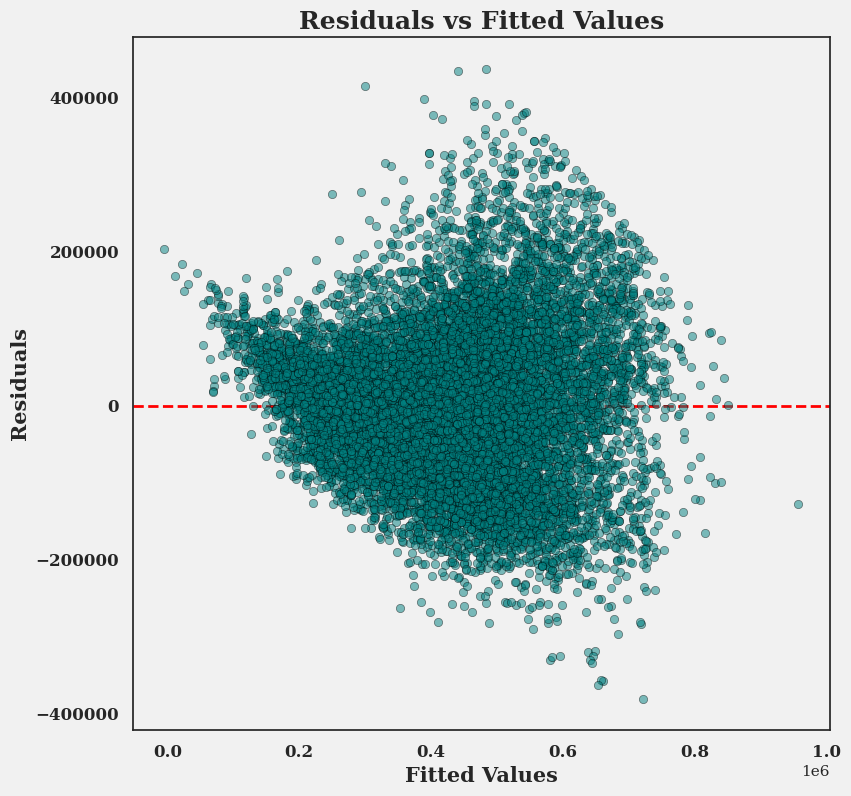

In [113]:
# plot the residuals

sns.scatterplot(x='fitted_values', y='residuals', data=residuals_df, color='teal', alpha=0.5, edgecolor='black', linewidth=0.5, zorder=3)
plt.axhline(y=residuals_df['residuals'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values', fontsize=18, fontweight='bold', font='Serif')
plt.xlabel('Fitted Values', fontsize=15, fontweight='bold', font='Serif')
plt.ylabel('Residuals', fontsize=15, fontweight='bold', font='Serif')
plt.xticks(fontsize=12, fontweight='bold', font='Serif')
plt.yticks(fontsize=12, fontweight='bold', font='Serif')
plt.show()

- **A heteroscedasticity test is a statistical test that is used to determine whether the variance of the residuals in a regression model is constant. If the variance of the residuals is not constant, then the model is said to be heteroscedastic. Heteroscedasticity can be a problem in regression analysis, as it can lead to inaccurate estimates of the model parameters.**

- **This is a hypothesis test that establishes a null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis is that at least one of the variances is different.**

- **The test uses the chi-squared distribution to calculate the test statistic and make a decision about the null hypothesis.**

In [104]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett( multiple_model.fittedvalues, multiple_model.resid)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(multiple_model.resid) - 1
probability = 1 - p_value

# get the critical value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# print the critical value
print(critical_value)


inf


- **If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.**

In [107]:
import scipy.stats as sp
# Bartlett's test
test_result, p_value = sp.bartlett(multiple_model.fittedvalues, multiple_model.resid)

# To interpret the results, we use a critical value of 0.05
alpha = 0.05

print('**Test statistic = {}**'.format(test_result))
print('**p-value = {}**'.format(p_value))

if p_value < alpha:
    print('**The variances are unequal, and the model should be reassessed.**')
else:
    print('**The variances are homogeneous!**')

**Test statistic = 1538.5317150354024**
**p-value = 0.0**
**The variances are unequal, and the model should be reassessed.**


In [116]:
# shipiro wilks
from scipy.stats import shapiro

# run the test
test_stat, p_value = shapiro(multiple_model.resid)

# print the p-value
print(p_value)

# set the significance level
alpha = 0.05

# check if the p-value is less than the significance level
if p_value < alpha:
    print('The residuals are not normally distributed')
else:
    print('The residuals are normally distributed')

    

3.082161986500113e-29
The residuals are not normally distributed


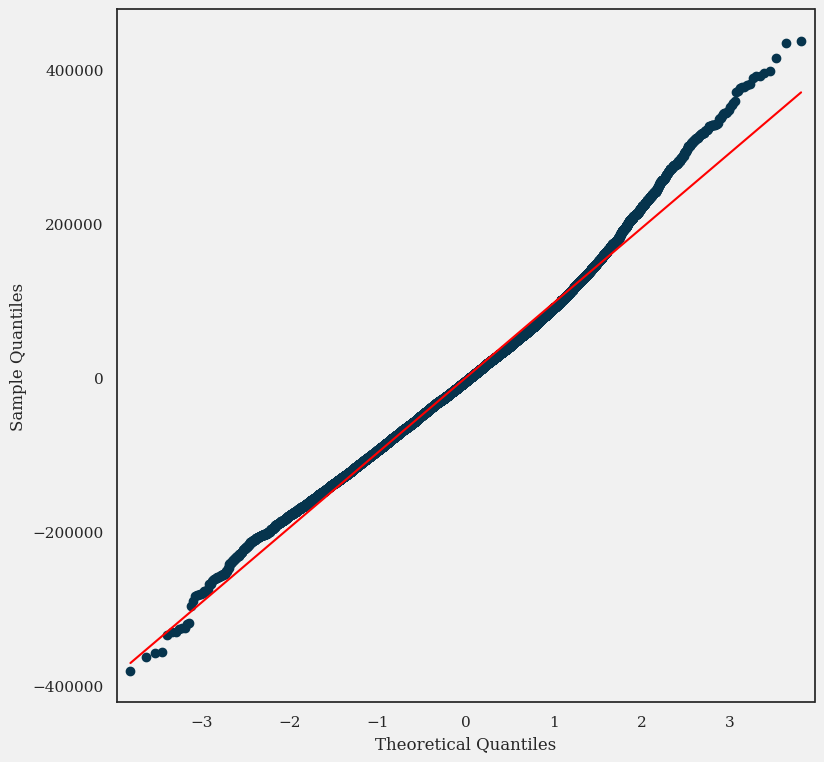

In [115]:
# plot a qqplot
import statsmodels.api as sm
import pylab

sm.qqplot(multiple_model.resid, line='s')
pylab.show()

**The data points fall above or below the line, meaning the data is not normally distributed.**

In [81]:
# get the coefficients and put them into a panddas data frame
coefficients_df= pd.DataFrame({'Feature': multiple_model.params.index, 'Coefficients': multiple_model.params.values})

coefficients_df

Feature  Coefficients
0     Intercept  -46950899.39
1      bedrooms     -11357.57
2     bathrooms      23667.27
3   sqft_living        100.11
4        floors      29915.68
5    waterfront         -0.00
6          view         -0.00
7     condition      24717.11
8         grade      77778.42
9      yr_built      -1738.02
10          lat     520824.62
11         long      65789.73
12         year      16475.29